In [ ]:
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas.util.testing as tm

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV 

# i used this code in a google colab environment due to the big dataset and its loading/preprocessing and training time
from google.colab import drive 
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


Mounted at /content/gdrive


In [ ]:
# source path to load the dataset(all_traffic.csv is a csv resulted from all the csvs in the zip-source archive)
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/all_traffic_2017and2018.csv', engine='python') #/content/gdrive/MyDrive/Colab Notebooks/ALL_TRAFFIC.csv
print(len(df))
print(df)
#print(df.shape()) 

In [ ]:
column_names = df[' Label']
print(column_names)
print(df)

0          BENIGN
1          BENIGN
2          BENIGN
3          BENIGN
4          BENIGN
            ...  
3119340    BENIGN
3119341    BENIGN
3119342    BENIGN
3119343    BENIGN
3119344    BENIGN
Name:  Label, Length: 3119345, dtype: object
                                          Flow ID  ...   Label
0         192.168.10.5-104.16.207.165-54865-443-6  ...  BENIGN
1           192.168.10.5-104.16.28.216-55054-80-6  ...  BENIGN
2           192.168.10.5-104.16.28.216-55055-80-6  ...  BENIGN
3         192.168.10.16-104.17.241.25-46236-443-6  ...  BENIGN
4         192.168.10.5-104.19.196.102-54863-443-6  ...  BENIGN
...                                           ...  ...     ...
3119340    192.168.10.3-192.168.10.14-53-51114-17  ...  BENIGN
3119341    192.168.10.3-192.168.10.16-53-24054-17  ...  BENIGN
3119342  192.168.10.51-23.208.163.130-58030-443-6  ...  BENIGN
3119343    192.168.10.3-192.168.10.14-53-51694-17  ...  BENIGN
3119344    192.168.10.3-192.168.10.14-53-57949-17  ...  BENIGN



In [ ]:
# i used labelencoder to encode all the string cols into int ones, that can be processed by the models
copy_df = df.copy()
#column_names = df[' Label']
le = LabelEncoder()
df['Flow ID'] = le.fit_transform(df['Flow ID'].astype(str))
#df['Source Port'] = le.fit_transform(df[' Source Port'].astype(str))
df['Label_Category'] = le.fit_transform(df[' Label'].astype(str))
#, ' Source Port'
df = df.drop([' Source IP',' Destination IP',' Timestamp',' Label'],axis=1)

In [ ]:
# i deleted all the records that had inf and NaN values
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)].astype(np.float64)
df = shuffle(df)
print(df)

          Flow ID   Source Port  ...   Idle Min  Label_Category
877204   583307.0         443.0  ...        0.0             0.0
956090   645387.0       57487.0  ...        0.0             0.0
3091818  805408.0       51386.0  ...        0.0             0.0
1091883  862135.0       53516.0  ...        0.0             0.0
2649227  100105.0       36030.0  ...        0.0             4.0
...           ...           ...  ...        ...             ...
778506   385479.0         443.0  ...        0.0             0.0
308214   374164.0       61285.0  ...        0.0             0.0
150271   253471.0       59655.0  ...        0.0             2.0
3030591  891447.0       58076.0  ...        0.0             0.0
117461    73895.0       29118.0  ...        0.0             2.0

[2827876 rows x 82 columns]


In [ ]:
# printing the length and order of each class and its records
print(len(df[df['Label_Category']==0]))#Benign
print(len(df[df['Label_Category']!=0]))#Malign
print(len(df[df['Label_Category']==1]))#Bot
print(len(df[df['Label_Category']==2]))#DDoS
print(len(df[df['Label_Category']==3]))#DoSGoldenEye
print(len(df[df['Label_Category']==4]))#DoSHulk
print(len(df[df['Label_Category']==5]))#DoSSlowhttptest
print(len(df[df['Label_Category']==6]))#DoSslowloris
print(len(df[df['Label_Category']==7]))#FTP
print(len(df[df['Label_Category']==8]))#Heartbleed
print(len(df[df['Label_Category']==9]))#Infiltration
print(len(df[df['Label_Category']==10]))#Portscan
print(len(df[df['Label_Category']==11]))#SSH
print(len(df[df['Label_Category']==12]))#BruteForce
print(len(df[df['Label_Category']==13]))#SqlInjection
print(len(df[df['Label_Category']==14]))#XSS
df.describe()

2271320
556556
1956
128025
10293
230124
5499
5796
7935
11
36
158804
5897
1507
21
652


,Flow ID,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_Category
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06,...,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06
mean,5.015107e+05,4.113793e+04,8.061534e+03,9.884209e+00,1.480065e+07,9.368972e+00,1.040396e+01,5.498522e+02,1.617903e+04,2.078044e+02,1.872929e+01,1.059900e+02,6.948479e+01,8.717304e+02,4.108922e+01,4.621981e+02,3.368232e+02,1.101675e+07,8.211792e+04,1.382863e+07,2.695537e+07,9.191785e+06,1.625442e+05,1.449765e+07,2.001217e+07,2.850309e+07,9.052107e+06,1.022929e+06,9.903861e+06,2.010341e+07,2.041550e+07,4.689442e+06,9.682420e+05,4.639595e-02,0.0,1.113910e-04,0.0,-2.602379e+04,-2.275588e+03,7.471063e+04,...,9.513591e+02,2.739786e+02,2.961443e+02,1.547790e+06,3.528266e-02,4.639595e-02,2.425849e-04,2.982836e-01,3.153147e-01,9.482948e-02,1.113910e-04,2.436458e-04,6.838443e-01,3.104781e+02,1.059900e+02,4.621981e+02,-2.602379e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.368972e+00,5.498417e+02,1.040396e+01,1.617869e+04,6.992389e+03,1.988290e+03,5.423519e+00,-2.744494e+03,3.690128e+05,1.339700e+06,1.533378e+05,5.835492e+04,2.128987e+07,1.804487e+06,8.704568e+06,7.928061e+06,1.063696e+00
std,2.948318e+05,2.229161e+04,1.827432e+04,5.263117e+00,3.366750e+07,7.500527e+02,9.978937e+02,9.998639e+03,2.264235e+06,7.175183e+02,6.035533e+01,3.057144e+03,7.846197e+02,1.947157e+03,6.888118e+01,1.065777e+04,1.405151e+03,1.344097e+08,2.941911e+06,2.072966e+08,3.104938e+08,2.447019e+07,2.951772e+06,3.358966e+07,3.157409e+08,3.295730e+08,2.453990e+07,8.595729e+06,2.874945e+07,3.380042e+08,2.949910e+08,1.716900e+07,8.313137e+06,2.103411e-01,0.0,1.055361e-02,0.0,2.106353e+07,1.452945e+06,2.832411e+06,...,2.029034e+03,6.090108e+03,1.157086e+03,3.858025e+07,1.844934e-01,2.103411e-01,1.557325e-02,4.575047e-01,4.646412e-01,2.929793e-01,1.055361e-02,1.560726e-02,6.8058

In [ ]:
# printed a .head() dataframe for each class in the dataset with its labels encoded
df_B =df [df["Label_Category"]==0].iloc[0:int(len(df[df["Label_Category"]==0]) / 7)]
print(df_B)
 
df_Bot = df[df["Label_Category"]==1].iloc[0:int(len(df[df["Label_Category"]==1]))]
print(df_Bot)
 
df_DDoS = df[df["Label_Category"]==2].iloc[0:int(len(df[df["Label_Category"]==2]) / 6)]
print(df_DDoS)
 
df_DoSGoldenEye = df[df["Label_Category"]==3].iloc[0:int(len(df[df["Label_Category"]==3]))]
print(df_DoSGoldenEye)
print("-----------------------------------------------------------------------")
df_DoSHulk = df[df["Label_Category"]==4].iloc[0:int(len(df[df["Label_Category"]==4]) / 10)]
print(df_DoSHulk)
 
df_DoSSlowhttptest = df[df["Label_Category"]==5].iloc[0:int(len(df[df["Label_Category"]==5]))]
print(df_DoSSlowhttptest)
 
df_DoSslowloris = df[df["Label_Category"]==6].iloc[0:int(len(df[df["Label_Category"]==6]))]
print(df_DoSslowloris)
print("-----------------------------------------------------------------------")
df_FTP = df[df["Label_Category"]==7].iloc[0:int(len(df[df["Label_Category"]==7]))]
print(df_FTP)
 
df_Heartbleed = df[df["Label_Category"]==8].iloc[0:int(len(df[df["Label_Category"]==8]))]
print(df_Heartbleed)
df_Infiltration = df[df["Label_Category"]==9].iloc[0:int(len(df[df["Label_Category"]==9]))]
print(df_Infiltration)
df_PortScan = df[df["Label_Category"]==10].iloc[0:int(len(df[df["Label_Category"]==10]) / 5)]
print(df_PortScan)
print("-----------------------------------------------------------------------")
df_SSH = df[df["Label_Category"]==11].iloc[0:int(len(df[df["Label_Category"]==11]))]
print(df_SSH)
 
df_BruteForce = df[df["Label_Category"]==12].iloc[0:int(len(df[df["Label_Category"]==12]))]
print(df_BruteForce)
 
df_SQLInj = df[df["Label_Category"]==13].iloc[0:int(len(df[df["Label_Category"]==13]))]
print(df_SQLInj)
 
df_XSS = df[df["Label_Category"]==14].iloc[0:int(len(df[df["Label_Category"]==14]) / 10)]
print(df_XSS)
 



          Flow ID   Source Port  ...   Idle Min  Label_Category
877204   583307.0         443.0  ...        0.0             0.0
956090   645387.0       57487.0  ...        0.0             0.0
3091818  805408.0       51386.0  ...        0.0             0.0
1091883  862135.0       53516.0  ...        0.0             0.0
2318158  312485.0       57225.0  ...        0.0             0.0
...           ...           ...  ...        ...             ...
2338431  810687.0       56724.0  ...        0.0             0.0
104710   819816.0       42554.0  ...  8107250.0             0.0
2945199  812723.0       58778.0  ...        0.0             0.0
1582084  862704.0       54085.0  ...        0.0             0.0
2337698  493174.0          80.0  ...        0.0             0.0

[324474 rows x 82 columns]
          Flow ID   Source Port  ...   Idle Min  Label_Category
618837  1025301.0        2871.0  ...        0.0             1.0
626053   453169.0        8080.0  ...        0.0             1.0
610190  1058

In [ ]:
# extracting the dataset X(that will be used for testing for the malignant dataset prediction - multiclass classification)
X = df[df['Label_Category']!=0]
df_test = df[0:int(len(df)/7)] # extracting the testing set for binary classification
df = df[int(len(df)/7+1):]
x_test = df_test
y_test = x_test['Label_Category']
#nums =  [*range(0,int(len(df)/5))]
#print(df_test)

In [ ]:
idx = df.index[df['Label_Category']==0]
print(len(idx))
idx2 = df.index[df['Label_Category']!=0]
print(len(idx2))

1946666
477227


In [ ]:
df.drop(axis=0, index=idx[0:int(len(idx)-len(idx)/2)], inplace=True)
#df.drop(axis=0, index=idx[0:int(len(idx)-len(idx)/6)], inplace=True)

In [ ]:
print(len(idx))
print(len(df['Label_Category']==0))

1946666
1450560


In [ ]:
idx3 = df.index[df['Label_Category']==0]
df.drop(axis=0, index=idx3[0:int(len(idx3)-len(idx3)/2)], inplace=True)

In [ ]:
# all the steps used before was to equalize the number of records for benign class(normal traffic) and malign class(attacks in the network)
print(len(idx3))
print(len(df['Label_Category']==0))

973333
963894


In [ ]:
print(len(df[df['Label_Category']==0]))#Benign
print(len(df[df['Label_Category']!=0]))#Malign
print(len(df[df['Label_Category']==1]))#Bot
print(len(df[df['Label_Category']==2]))#DDoS
print(len(df[df['Label_Category']==3]))#DoSGoldenEye
print(len(df[df['Label_Category']==4]))#DoSHulk
print(len(df[df['Label_Category']==5]))#DoSSlowhttptest
print(len(df[df['Label_Category']==6]))#DoSslowloris
print(len(df[df['Label_Category']==7]))#FTP
print(len(df[df['Label_Category']==8]))#Heartbleed
print(len(df[df['Label_Category']==9]))#Infiltration
print(len(df[df['Label_Category']==10]))#Portscan
print(len(df[df['Label_Category']==11]))#SSH
print(len(df[df['Label_Category']==12]))#BruteForce
print(len(df[df['Label_Category']==13]))#SqlInjection
print(len(df[df['Label_Category']==14]))#XSS
df.describe()
"""

"""

486667
477227
1663
109751
8796
197529
4734
5014
6843
8
32
135923
5067
1295
17
555


,Flow ID,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_Category
count,9.638940e+05,963894.000000,963894.000000,963894.000000,9.638940e+05,963894.000000,963894.000000,9.638940e+05,9.638940e+05,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,9.638940e+05,963894.000000,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,963894.000000,963894.0,963894.000000,963894.0,9.638940e+05,9.638940e+05,9.638940e+05,...,963894.000000,9.638940e+05,963894.000000,9.638940e+05,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,963894.000000,9.638940e+05,9.638940e+05,963894.0,963894.0,963894.0,963894.0,963894.0,963894.0,963894.000000,9.638940e+05,963894.000000,9.638940e+05,963894.000000,963894.000000,963894.000000,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,9.638940e+05,963894.000000
mean,3.803836e+05,43286.200872,5998.888051,8.442633,2.021877e+07,8.071906,8.586226,4.320698e+02,1.413402e+04,172.604425,12.542658,74.487994,60.084089,1591.927096,26.449969,6.186810e+02,657.850521,8.503068e+06,9.116515e+04,9.965114e+06,2.018978e+07,1.633936e+07,1.847868e+05,1.994379e+07,1.458988e+07,2.229480e+07,1.621916e+07,8.424753e+05,9.492392e+06,1.332520e+07,1.420544e+07,6.105996e+06,7.378633e+05,0.033612,0.0,0.000077,0.0,-3.018453e+03,3.229178e+01,8.195648e+04,...,1643.141406,3.276405e+02,518.464429,1.824320e+06,0.061204,0.033612,0.000161,0.359235,0.358987,0.062759,0.000077,0.000161,0.657081,361.387386,74.487994,6.186810e+02,-3.018453e+03,0.0,0.0,0.0,0.0,0.0,0.0,8.071906,4.320390e+02,8.586226,1.413441e+04,7132.679534,1357.291916,4.417095,-3.215125e+02,2.446586e+05,8.817340e+05,1.393178e+05,6.981492e+04,2.346540e+07,1.763434e+06,1.592770e+07,1.461943e+07,2.674748
std,2.856786e+05,19018.103028,15536.660924,4.576150,3.776783e+07,697.723459,924.104791,1.485015e+04,2.121646e+06,580.024163,54.786791,2239.595214,224.343809,2770.002696,58.144344,8.147147e+03,1219.652712,1.158710e+08,3.321069e+06,1.693207e+08,2.473459e+08,3.320279e+07,3.310837e+06,3.774431e+07,2.487550e+08,2.624593e+08,3.326756e+07,7.936187e+06,2.806119e+07,2.666293e+08,2.351853e+08,2.119353e+07,7.276648e+06,0.180227,0.0,0.008762,0.0,1.736443e+06,1.718824e+05,3.030213e+06,...,2793.574316,4.763453e+03,882.623829,3.628587e+07,0.239704,0.180227,0.012680,0.479776,0.479704,0.242529,0.008762,0.012680,0.642691,4546.176277,2239.595214,8.147147e+03,1.736443e+06,0.0,0.0,0.0,0.0,0.0,0.0,697.723459,1.482342e+04,924.104791,2.121821e+06,13385.495076,68

In [ ]:
# making some copies of the main DF and splitting the main DF(df) into df_train and df_validation
dx = df.copy()
x = dx.copy()
#y = dx['Label_Category']
#X = dx[dx['Label_Category']!=0]


print(x)
#x.loc[x['Label_Category'] > 0, 'Label_Category'] = 1
y = x['Label_Category']
print(x)
print(y)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)


#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2
print('----------------------------------------------------------------')
print(len(x_train))
print(len(x_val))
print(len(x_test))
print('----------------------------------------------------------------')
x_train = x_train.drop(['Label_Category'],axis=1)

           Flow ID   Source Port  ...    Idle Min  Label_Category
172166    121784.0       39085.0  ...         0.0             2.0
2755887   228050.0       55846.0  ...         0.0             4.0
2540667   226665.0       55750.0  ...         0.0             4.0
2728271   240558.0       57818.0  ...  86600000.0             4.0
2693528   128314.0       39998.0  ...  85500000.0             4.0
...            ...           ...  ...         ...             ...
2650204   110257.0       37402.0  ...         0.0             4.0
2369154   814171.0       60235.0  ...         0.0             0.0
817757   1080317.0        2825.0  ...         0.0             0.0
1316900   890451.0       64800.0  ...         0.0             0.0
583737    497311.0         443.0  ...         0.0             0.0

[963894 rows x 82 columns]
           Flow ID   Source Port  ...    Idle Min  Label_Category
172166    121784.0       39085.0  ...         0.0             2.0
2755887   228050.0       55846.0  ...         0.

In [ ]:
copie = dx.copy()
copieB = copie[copie['Label_Category']==0]
copieB = copieB[0:30000]
print(copieB)
copieM = copie[copie['Label_Category']!=0]
copieM = copieM[0:90000]
print(copieM)
frames = [copieB, copieM]
cp = pd.concat(frames)
print(cp)
cp.to_csv("SampleFinal.csv")

          Flow ID   Source Port  ...   Idle Min  Label_Category
954410   473087.0       53268.0  ...        0.0             0.0
3046121  879792.0       54056.0  ...        0.0             0.0
2317422  722563.0       21637.0  ...        0.0             0.0
1191152  924906.0          80.0  ...        0.0             0.0
2882257   46239.0       57373.0  ...        0.0             0.0
...           ...           ...  ...        ...             ...
1204163  683480.0       17826.0  ...        0.0             0.0
2296542  883658.0       57953.0  ...        0.0             0.0
2006335  373163.0       60283.0  ...        0.0             0.0
2137579  845936.0       36000.0  ...        0.0             0.0
1475017  922039.0       57570.0  ...        0.0             0.0

[90000 rows x 82 columns]
          Flow ID   Source Port  ...    Idle Min  Label_Category
172166   121784.0       39085.0  ...         0.0             2.0
2755887  228050.0       55846.0  ...         0.0             4.0
2540667  2

In [ ]:
import gc
del copieB, copieM, frames, cp
gc.collect()

192

In [ ]:
# gridseachcv to search for the best parameters to train an SVC model
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [1] #[0.1, 1, 10, 100]
    gammas = [0.1] #[ 0.00001, 0.0001, 0.001, 0.01, 0.1]
    param_grid = {'C': Cs,'gamma':gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

Rbf=svc_param_selection(x_train,y_train,3)
print(Rbf)

In [ ]:
# used a minmaxscaler to scale and standardize the training dataset to be much easier for the model to be learned/trained
#  (0 Benign, 1 Malign, records !=0 => 1)
#scaler = StandardScaler()  #https://stackoverflow.com/questions/20624353/why-cant-linearsvc-do-this-simple-classification
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_normalized = scaler.fit_transform(x_train)
#penalty='l2', loss='squared_hinge', dual=False,
model = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.00001, C=1, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=0, max_iter=10000)
model.fit(x_train_normalized, y_train) #train your model

In [ ]:
#model2 = SVC(kernel='poly',C=0.1,gamma=10)
#model2.fit(x_train_normalized,y_train)

In [ ]:
model3 = RandomForestClassifier(n_estimators=5)
model3.fit(x_train_normalized,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Validation Set - also standardizing and scaling it with the scaler from the above
# getting the prediction score on the validation set for each used model/algorithm(for benign-normal class and malign-attacks class)
x_val_BENIGN = x_val[x_val['Label_Category']==0]
x_val_BENIGN = x_val_BENIGN.drop(['Label_Category'],axis=1)

x_val_MALIGN = x_val[x_val['Label_Category']!=0]
x_val_MALIGN = x_val_MALIGN.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
y_val_BENIGN = y_val[y_val==0]
y_val_MALIGN = y_val[y_val!=0]
#---------------------------------------------------------------------------------------------------------------


x_val_normalized_B = scaler.transform(x_val_BENIGN)
x_val_normalized_M = scaler.transform(x_val_MALIGN)

benign = model.score(x_val_normalized_B, y_val_BENIGN)
#benign2 = model2.score(x_val_normalized_B, y_val_BENIGN)
benign3 = model3.score(x_val_normalized_B, y_val_BENIGN)

benign *= 100
benign3 *= 100
print('Benign LinearSVC- set validare: '+str(benign)+"%")
#print('Benign2: '+str(benign2))
print('Benign RF- set validare: '+str(benign3)+"%")

malign = model.score(x_val_normalized_M, y_val_MALIGN)
#malign2 = model2.score(x_val_normalized_M, y_val_MALIGN)
malign3 = model3.score(x_val_normalized_M, y_val_MALIGN)

malign *= 100
malign3 *= 100
print('Malign LinearSVC- set validare: '+str(malign)+"%")
print('Malign RF- set validare: '+str(malign3)+"%")


Benign LinearSVC- set validare: 94.22387629262397%
Benign RF- set validare: 99.99038686021122%
Malign LinearSVC- set validare: 98.44135565810203%
Malign RF- set validare: 99.97629968353107%


In [ ]:
"""
x_val_matrix_BENIGN = x_val[x_val['Label_Category']==0]
x_val_matrix_BENIGN = x_val_matrix_BENIGN.drop(['Label_Category'],axis=1)
print(x_val_matrix_BENIGN)

x_val_matrix_MALIGN = x_val[x_val['Label_Category']!=0]
x_val_matrix_MALIGN = x_val_matrix_MALIGN.drop(['Label_Category'],axis=1)
print(x_val_matrix_MALIGN)

y_predict_val_BENIGN = model.predict(x_val_matrix_BENIGN)
print(len(y_predict_val_BENIGN))

y_predict_val_MALIGN = model.predict(x_val_matrix_MALIGN)
print(len(y_predict_val_MALIGN))

y_predict_val = np.concatenate((y_predict_val_BENIGN,y_predict_val_MALIGN))
print(len(y_predict_val))

y_B = y_val[y_val==0]
print(len(y_B))

y_M = y_val[y_val!=0]
print(len(y_M))

y_actual = np.concatenate((y_B, y_M))
"""
y_actual_val = y_val.copy()
x_val_matrix = x_val.drop(['Label_Category'], axis=1)
x_val_matrix = scaler.transform(x_val_matrix)
y_predict_val_bin = pd.DataFrame(model.predict(x_val_matrix))
y_predict3_val_bin = pd.DataFrame(model3.predict(x_val_matrix))

In [ ]:
# confusions matrices - LinearSVC and RandomForest
coloane = []
matrice_confuzie_validare_LSVC = pd.DataFrame(confusion_matrix(y_actual_val, y_predict_val_bin))
print("MATRICE CONFUZIE VALIDARE - LSVC: "+str(len(y_predict_val_bin)))
print(matrice_confuzie_validare_LSVC)
matrice_confuzie_validare_RF = pd.DataFrame(confusion_matrix(y_actual_val, y_predict3_val_bin))
print("MATRICE CONFUZIE VALIDARE - RF: "+str(len(y_predict3_val_bin)))
print(matrice_confuzie_validare_RF)
print('----------------------------------------------------------------------')


MATRICE CONFUZIE VALIDARE - LSVC: 144546
       0      1
0  68611   4206
1   1118  70611
MATRICE CONFUZIE VALIDARE - RF: 144546
       0      1
0  72810      7
1     17  71712
----------------------------------------------------------------------


In [ ]:
# classification reports for the predictions made on the validation sets
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

print('----------------------------------------------------------------------')
print("Raport de clasificare - SVM")
report = classification_report(y_actual_val, y_predict_val_bin, labels=[0, 1], output_dict=True)
report_tabel = pd.DataFrame(report).transpose()
print(report_tabel)
print('----------------------------------------------------------------------')
print("\n")
print('----------------------------------------------------------------------')
print("Raport de clasificare - RF")
report3 = classification_report(y_actual_val, y_predict3_val_bin, labels=[0, 1], output_dict=True)
report3_tabel = pd.DataFrame(report3).transpose()
print(report3_tabel)
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
Raport de clasificare - SVM
              precision    recall  f1-score        support
0              0.983966  0.942239  0.962651   72817.000000
1              0.943783  0.984414  0.963670   71729.000000
accuracy       0.963167  0.963167  0.963167       0.963167
macro avg      0.963875  0.963326  0.963160  144546.000000
weighted avg   0.964026  0.963167  0.963157  144546.000000
----------------------------------------------------------------------


----------------------------------------------------------------------
Raport de clasificare - RF
              precision    recall  f1-score        support
0              0.999767  0.999904  0.999835   72817.000000
1              0.999902  0.999763  0.999833   71729.000000
accuracy       0.999834  0.999834  0.999834       0.999834
macro avg      0.999834  0.999833  0.999834  144546.000000
weighted avg   0.999834  0.999834  0.999834  144546.000000
----------------------

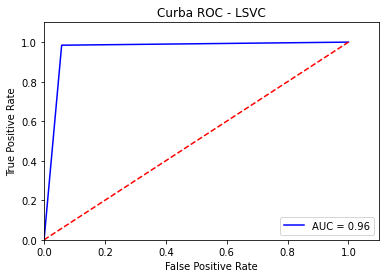

------------------------------------------------RF


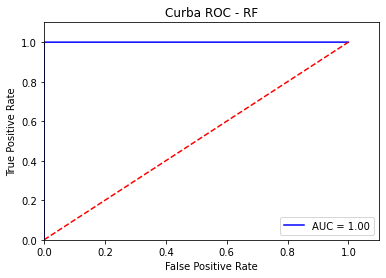

In [ ]:
# AUC-ROC curves were drawed for the validation set for each model
fpr, tpr, threshold = metrics.roc_curve(y_actual_val, y_predict_val_bin)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curba ROC - LSVC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('------------------------------------------------RF')
fpr, tpr, threshold = metrics.roc_curve(y_actual_val, y_predict3_val_bin)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curba ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# here, the binary prediction results are given by the algorithms on the testing set(for each class-benign and malign)
x_test.loc[x_test['Label_Category'] > 0, 'Label_Category'] = 1
y_test = x_test['Label_Category']
#SET DE TEST
x_test_BENIGN = x_test[x_test['Label_Category']==0]
x_test_BENIGN = x_test_BENIGN.drop(['Label_Category'],axis=1)

x_test_MALIGN = x_test[x_test['Label_Category']!=0]
x_test_MALIGN = x_test_MALIGN.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
y_test_BENIGN = y_test[y_test==0]
y_test_MALIGN = y_test[y_test!=0]
#---------------------------------------------------------------------------------------------------------------
x_test_normalized_B = scaler.transform(x_test_BENIGN)
x_test_normalized_M = scaler.transform(x_test_MALIGN)

benign_test = model.score(x_test_normalized_B, y_test_BENIGN)
benign3_test = model3.score(x_test_normalized_B, y_test_BENIGN)
print('Benign LinearSVC- set testare: '+str(benign_test)+"%")
print('Benign RF- set testare: '+str(benign3_test)+"%")

malign_test = model.score(x_test_normalized_M, y_test_MALIGN)
malign3_test = model3.score(x_test_normalized_M, y_test_MALIGN)
malign_test *= 100
malign3_test *= 100
print('Malign LinearSVC- set testare: '+str(malign_test)+"%")
print('Malign RF- set testare: '+str(malign3_test)+"%")

print('\n')
y_actual_test = y_test
x_test_matrix = x_test.drop(['Label_Category'], axis=1)
x_test_matrix = scaler.transform(x_test_matrix)
y_predict_test_bin= model.predict(x_test_matrix)
y_predict3_test_bin = model3.predict(x_test_matrix)

# CONFUSION MATRICES - 1st LSVC, 2nd RF
matrice_confuzie_test_LSVC = pd.DataFrame(confusion_matrix(y_actual_test, y_predict_test_bin))
print("MATRICE CONFUZIE TEST - LSVC: "+str(len(y_predict_test_bin)))
print(matrice_confuzie_test_LSVC)
matrice_confuzie_test_RF = pd.DataFrame(confusion_matrix(y_actual_test, y_predict3_test_bin))
print('--------------------------------------------------------\n')
print("MATRICE CONFUZIE TEST - RF: "+str(len(y_predict3_test_bin)))
print(matrice_confuzie_test_RF)

Benign LinearSVC- set testare: 0.941827264037495%
Benign RF- set testare: 0.9998889950972835%
Malign LinearSVC- set testare: 98.3670549251933%
Malign RF- set testare: 99.99246912340597%


MATRICE CONFUZIE TEST - LSVC: 403982
        0      1
0  305444  18866
1    1301  78371
--------------------------------------------------------

MATRICE CONFUZIE TEST - RF: 403982
        0      1
0  324274     36
1       6  79666


----------------------------------------------------------------------
Raport de clasificare - SVM
              precision    recall  f1-score        support
0              0.995666  0.942773  0.968497  324547.000000
1              0.807884  0.983232  0.886975   79435.000000
accuracy       0.950728  0.950728  0.950728       0.950728
macro avg      0.901775  0.963002  0.927736  403982.000000
weighted avg   0.958742  0.950728  0.952468  403982.000000
----------------------------------------------------------------------


----------------------------------------------------------------------
Raport de clasificare - RF
              precision    recall  f1-score        support
0              0.999960  0.999871  0.999915  324547.000000
1              0.999471  0.999836  0.999654   79435.000000
accuracy       0.999864  0.999864  0.999864       0.999864
macro avg      0.999716  0.999853  0.999785  403982.000000
weighted avg   0.999864  0.999864  0.999864  403982.000000
----------------------

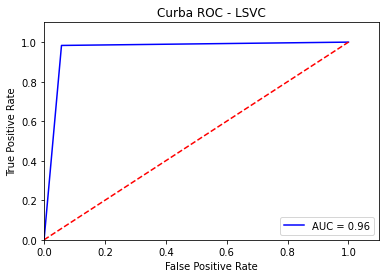

--------------------------------------------------RF


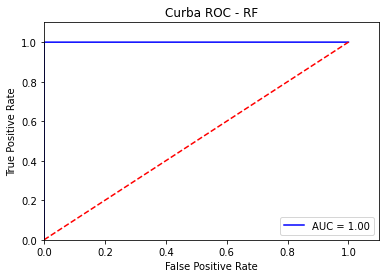

In [ ]:
# classification reports for the binary classification on the testing set and AUC-ROC curves are printed here
print('----------------------------------------------------------------------')
print("Raport de clasificare - SVM")
report = classification_report(y_actual_test, y_predict_test_bin, labels=[0, 1], output_dict=True)
report_tabel = pd.DataFrame(report).transpose()
print(report_tabel)
print('----------------------------------------------------------------------')
print("\n")
print('----------------------------------------------------------------------')
print("Raport de clasificare - RF")
report3 = classification_report(y_actual_test, y_predict3_test_bin, labels=[0, 1], output_dict=True)
report3_tabel = pd.DataFrame(report3).transpose()
print(report3_tabel)
print('----------------------------------------------------------------------')



fpr, tpr, threshold = metrics.roc_curve(y_actual_test, y_predict_test_bin)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curba ROC - LSVC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('--------------------------------------------------RF')
fpr, tpr, threshold = metrics.roc_curve(y_actual_test, y_predict3_test_bin)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curba ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
column_names = ['Benign', 'Malign']
matrice_confuzie_validare_LSVC.to_csv ('matrice_confuzie_validare_LSVC.csv', index = False, header=column_names)
matrice_confuzie_validare_RF.to_csv ('matrice_confuzie_validare_RF.csv', index = False, header=column_names)
matrice_confuzie_test_LSVC.to_csv ('matrice_confuzie_test_LSVC.csv', index = False, header=column_names)
matrice_confuzie_test_RF.to_csv ('matrice_confuzie_test_RF.csv', index = False, header=column_names)

In [ ]:
# HERE, the X dataframe contains only the attacks from the network to train other models of the same algorithm
# and to try to classify the attacks with a better accuracy for each class
Y = X['Label_Category']
XM_train, XM_test, YM_train, YM_test = train_test_split(X,Y,test_size=0.2,random_state=42)

XM_train = XM_train.drop(['Label_Category'],axis=1)

XM_test_Bot = XM_test[XM_test['Label_Category']==1]
XM_test_Bot = XM_test_Bot.drop(['Label_Category'],axis=1)

XM_test_DDoS = XM_test[XM_test['Label_Category']==2]
XM_test_DDoS = XM_test_DDoS.drop(['Label_Category'],axis=1)

XM_test_DoSGoldenEye = XM_test[XM_test['Label_Category']==3]
XM_test_DoSGoldenEye = XM_test_DoSGoldenEye.drop(['Label_Category'],axis=1)

XM_test_DoSHulk = XM_test[XM_test['Label_Category']==4]
XM_test_DoSHulk = XM_test_DoSHulk.drop(['Label_Category'],axis=1)

XM_test_DoSSlowhttptest = XM_test[XM_test['Label_Category']==5]
XM_test_DoSSlowhttptest = XM_test_DoSSlowhttptest.drop(['Label_Category'],axis=1)

XM_test_DoSslowloris = XM_test[XM_test['Label_Category']==6]
XM_test_DoSslowloris = XM_test_DoSslowloris.drop(['Label_Category'],axis=1)

XM_test_FTP = XM_test[XM_test['Label_Category']==7]
XM_test_FTP = XM_test_FTP.drop(['Label_Category'],axis=1)

XM_test_SSH = XM_test[XM_test['Label_Category']==11]
XM_test_SSH = XM_test_SSH.drop(['Label_Category'],axis=1)

XM_test_Heartbleed = XM_test[XM_test['Label_Category']==8]
XM_test_Heartbleed = XM_test_Heartbleed.drop(['Label_Category'],axis=1)

XM_test_Infiltration = XM_test[XM_test['Label_Category']==9]
XM_test_Infiltration = XM_test_Infiltration.drop(['Label_Category'],axis=1)

XM_test_PortScan = XM_test[XM_test['Label_Category']==10]
XM_test_PortScan = XM_test_PortScan.drop(['Label_Category'],axis=1)

XM_test_BruteForce = XM_test[XM_test['Label_Category']==12]
XM_test_BruteForce = XM_test_BruteForce.drop(['Label_Category'],axis=1)

XM_test_SqlInjection = XM_test[XM_test['Label_Category']==13]
XM_test_SqlInjection = XM_test_SqlInjection.drop(['Label_Category'],axis=1)

XM_test_XSS = XM_test[XM_test['Label_Category']==14]
XM_test_XSS = XM_test_XSS.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
YM_test_XSS = YM_test[YM_test==14]
YM_test_SqlInjection = YM_test[YM_test==13]
YM_test_BruteForce = YM_test[YM_test==12]
YM_test_PortScan = YM_test[YM_test==10]
YM_test_BENIGN = YM_test[YM_test==0]
YM_test_MALIGN = YM_test[YM_test!=0]
YM_test_Bot = YM_test[YM_test==1]
YM_test_DDoS = YM_test[YM_test==2]
YM_test_DoSGoldenEye = YM_test[YM_test==3]
YM_test_DoSHulk = YM_test[YM_test==4]
YM_test_DoSSlowhttptest = YM_test[YM_test==5]
YM_test_DoSslowloris = YM_test[YM_test==6]
YM_test_FTP = YM_test[YM_test==7]
YM_test_SSH = YM_test[YM_test==11]
YM_test_Heartbleed = YM_test[YM_test==8]
YM_test_Infiltration = YM_test[YM_test==9]

In [ ]:
# also, the multiclass training set it's scaled and normalized
scaler_2 = MinMaxScaler()
scaler_2.fit(XM_train)
XM_train_normalized = scaler_2.fit_transform(XM_train)
#model = SVC(kernel='poly',C=1,gamma=10)
#model.fit(XM_train_normalized, YM_train)

In [ ]:
# training phase for LinearSVC - it's a little faster than simple SVC on this big dataset
model2 = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.00001, C=1, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=0, max_iter=10000)
model2.fit(XM_train_normalized, YM_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [ ]:
# training phase for RandomForest
model3 = RandomForestClassifier(n_estimators=5)
model3.fit(XM_train_normalized, YM_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# printing the accuracy % of succes for each class(LinearSVC and RandomForest for every class in order)
from statistics import mean
SVC = []
LSVC = []
RF = []

XM_test_Bot_normalized = scaler_2.transform(XM_test_Bot)
#bot = model.score(XM_test_Bot_normalized, YM_test_Bot)
bot2 = model2.score(XM_test_Bot_normalized, YM_test_Bot)
bot3 = model3.score(XM_test_Bot_normalized, YM_test_Bot)
#SVC.append(bot)
LSVC.append(bot2)
RF.append(bot3)
#print('Bot(SVC): '+str(bot))
print('Bot2(LSVC): '+str(bot2))
print('Bot3(RF): '+str(bot3))
print('\n')

XM_test_DDoS_normalized = scaler_2.transform(XM_test_DDoS)
#DDoS = model.score(XM_test_DDoS_normalized, YM_test_DDoS)
DDoS2 = model2.score(XM_test_DDoS_normalized, YM_test_DDoS)
DDoS3 = model3.score(XM_test_DDoS_normalized, YM_test_DDoS)
#SVC.append(DDoS)
LSVC.append(DDoS2)
RF.append(DDoS3)
#print('DDoS(SVC): '+str(DDoS))
print('DDoS2(LSVC): '+str(DDoS2))
print('DDoS3(RF): '+str(DDoS3))
print('\n')

XM_test_DoSGoldenEye_normalized = scaler_2.transform(XM_test_DoSGoldenEye)
#DoSGoldenEye = model.score(XM_test_DoSGoldenEye_normalized, YM_test_DoSGoldenEye)
DoSGoldenEye2 = model2.score(XM_test_DoSGoldenEye_normalized, YM_test_DoSGoldenEye)
DoSGoldenEye3 = model3.score(XM_test_DoSGoldenEye_normalized, YM_test_DoSGoldenEye)
#SVC.append(DoSGoldenEye)
LSVC.append(DoSGoldenEye2)
RF.append(DoSGoldenEye3)
#print('DoSGoldenEye(SVC): '+str(DoSGoldenEye))
print('DoSGoldenEye2(LSVC): '+str(DoSGoldenEye2))
print('DoSGoldenEye3(RF): '+str(DoSGoldenEye3))
print('\n')

XM_test_DoSSlowhttptest_normalized = scaler_2.transform(XM_test_DoSSlowhttptest)
#DoSSlowhttptest = model.score(XM_test_DoSSlowhttptest_normalized, YM_test_DoSSlowhttptest)
DoSSlowhttptest2 = model2.score(XM_test_DoSSlowhttptest_normalized, YM_test_DoSSlowhttptest)
DoSSlowhttptest3 = model3.score(XM_test_DoSSlowhttptest_normalized, YM_test_DoSSlowhttptest)
#SVC.append(DoSSlowhttptest)
LSVC.append(DoSSlowhttptest2)
RF.append(DoSSlowhttptest3)
#print('DoSSlowhttptest(SVC): '+str(DoSSlowhttptest))
print('DoSSlowhttptest2(LSVC): '+str(DoSSlowhttptest2))
print('DoSSlowhttptest3(RF): '+str(DoSSlowhttptest3))
print('\n')

XM_test_DoSHulk_normalized = scaler_2.transform(XM_test_DoSHulk)
#DoSHulk = model.score(XM_test_DoSHulk_normalized, YM_test_DoSHulk)
DoSHulk2 = model2.score(XM_test_DoSHulk_normalized, YM_test_DoSHulk)
DoSHulk3 = model3.score(XM_test_DoSHulk_normalized, YM_test_DoSHulk)
#SVC.append(DoSHulk)
LSVC.append(DoSHulk2)
RF.append(DoSHulk3)
#print('DoSHulk(SVC): '+str(DoSHulk))
print('DoSHulk2(LSVC): '+str(DoSHulk2))
print('DoSHulk3(RF): '+str(DoSHulk3))
print('\n')

XM_test_DoSslowloris_normalized = scaler_2.transform(XM_test_DoSslowloris)
#DoSslowloris = model.score(XM_test_DoSslowloris_normalized, YM_test_DoSslowloris)
DoSslowloris2 = model2.score(XM_test_DoSslowloris_normalized, YM_test_DoSslowloris)
DoSslowloris3 = model3.score(XM_test_DoSslowloris_normalized, YM_test_DoSslowloris)
#SVC.append(DoSslowloris)
LSVC.append(DoSslowloris2)
RF.append(DoSslowloris3)
#print('DoSslowloris(SVC): '+str(DoSslowloris))
print('DoSslowloris2(LSVC): '+str(DoSslowloris2))
print('DoSslowloris3(RF): '+str(DoSslowloris3))
print('\n')

XM_test_FTP_normalized = scaler_2.transform(XM_test_FTP)
#FTP = model.score(XM_test_FTP_normalized , YM_test_FTP)
FTP2 = model2.score(XM_test_FTP_normalized , YM_test_FTP)
FTP3 = model3.score(XM_test_FTP_normalized , YM_test_FTP)
#SVC.append(FTP)
LSVC.append(FTP2)
RF.append(FTP3)
#print('FTP_Patator(SVC): '+str(FTP))
print('FTP_Patator2(LSVC): '+str(FTP2))
print('FTP_Patator3(RF): '+str(FTP3))
print('\n')

XM_test_SSH_normalized = scaler_2.transform(XM_test_SSH)
#SSH = model.score(XM_test_SSH_normalized, YM_test_SSH)
SSH2 = model2.score(XM_test_SSH_normalized, YM_test_SSH)
SSH3 = model3.score(XM_test_SSH_normalized, YM_test_SSH)
#SVC.append(SSH)
LSVC.append(SSH2)
RF.append(SSH3)
#print('SSH_Patator(SVC): '+str(SSH))
print('SSH_Patator2(LSVC): '+str(SSH2))
print('SSH_Patator3(RF): '+str(SSH3))
print('\n')

XM_test_Heartbleed_normalized = scaler_2.transform(XM_test_Heartbleed)
#Heartbleed = model.score(XM_test_Heartbleed_normalized, YM_test_Heartbleed)
Heartbleed2 = model2.score(XM_test_Heartbleed_normalized, YM_test_Heartbleed)
Heartbleed3 = model3.score(XM_test_Heartbleed_normalized, YM_test_Heartbleed)
#SVC.append(Heartbleed)
LSVC.append(Heartbleed2)
RF.append(Heartbleed3)
#print('Heartbleed(SVC): '+str(Heartbleed))
print('Heartbleed2(LSVC): '+str(Heartbleed2))
print('Heartbleed3(RF): '+str(Heartbleed3))
print('\n')
XM_test_Infiltration_normalized = scaler_2.transform(XM_test_Infiltration)
#Infiltration = model.score(XM_test_Infiltration_normalized, YM_test_Infiltration)
Infiltration2 = model2.score(XM_test_Infiltration_normalized, YM_test_Infiltration)
Infiltration3 = model3.score(XM_test_Infiltration_normalized, YM_test_Infiltration)
#SVC.append(Infiltration)
LSVC.append(Infiltration2)
RF.append(Infiltration3)
#print('Infiltration(SVC): '+str(Infiltration))
print('Infiltration2(LSVC): '+str(Infiltration2))
print('Infiltration3(RF): '+str(Infiltration3))
print('\n')

XM_test_PortScan_normalized = scaler_2.transform(XM_test_PortScan)
#PortScan = model.score(XM_test_PortScan_normalized, YM_test_PortScan)
PortScan2 = model2.score(XM_test_PortScan_normalized, YM_test_PortScan)
PortScan3 = model3.score(XM_test_PortScan_normalized, YM_test_PortScan)
#SVC.append(PortScan)
LSVC.append(PortScan2)
RF.append(PortScan3)
#print('PortScan(SVC): '+str(PortScan))
print('PortScan2(LSVC): '+str(PortScan2))
print('PortScan3(RF): '+str(PortScan3))
print('\n')

XM_test_BruteForce_normalized = scaler_2.transform(XM_test_BruteForce)
#BruteForce = model.score(XM_test_BruteForce_normalized, YM_test_BruteForce)
BruteForce2 = model2.score(XM_test_BruteForce_normalized, YM_test_BruteForce)
BruteForce3 = model3.score(XM_test_BruteForce_normalized, YM_test_BruteForce)
#SVC.append(BruteForce)
LSVC.append(BruteForce2)
RF.append(BruteForce3)
#print('Web Attack - Brute Force(SVC): '+str(BruteForce))
print('Web Attack - Brute Force2(LSVC): '+str(BruteForce2))
print('Web Attack - Brute Force3(RF): '+str(BruteForce3))
print('\n')

XM_test_SqlInjection_normalized = scaler_2.transform(XM_test_SqlInjection)
#SqlInjection = model.score(XM_test_SqlInjection_normalized, YM_test_SqlInjection)
SqlInjection2 = model2.score(XM_test_SqlInjection_normalized, YM_test_SqlInjection)
SqlInjection3 = model3.score(XM_test_SqlInjection_normalized, YM_test_SqlInjection)
#SVC.append(SqlInjection)
LSVC.append(SqlInjection2)
RF.append(SqlInjection3)
#print('Web Attack - SqlInjection(SVC): '+str(SqlInjection))
print('Web Attack - SqlInjection2(LSVC): '+str(SqlInjection2))
print('Web Attack - SqlInjection3(RF): '+str(SqlInjection3))
print('\n')

XM_test_XSS_normalized = scaler_2.transform(XM_test_XSS)
#XSS = model.score(XM_test_XSS_normalized, YM_test_XSS)
XSS2 = model2.score(XM_test_XSS_normalized, YM_test_XSS)
XSS3 = model3.score(XM_test_XSS_normalized, YM_test_XSS)
#SVC.append(XSS)
LSVC.append(XSS2)
RF.append(XSS3)
#print('Web Attack - XSS(SVC): '+str(XSS))
print('Web Attack - XSS2(LSVC): '+str(XSS2))
print('Web Attack - XSS3(RF): '+str(XSS3))
print('\n')
#print('Medie procent SVC-total atacuri:'+str(mean(SVC)))
print('Medie procent LSVC-total atacuri:'+str(mean(LSVC)))
print('Medie procent RF-total atacuri:'+str(mean(RF)))

Bot2(LSVC): 0.9974683544303797
Bot3(RF): 1.0


DDoS2(LSVC): 0.9991004028630657
DDoS3(RF): 0.9999217741620057


DoSGoldenEye2(LSVC): 0.9606986899563319
DoSGoldenEye3(RF): 0.9980591945657448


DoSSlowhttptest2(LSVC): 0.9668755595344674
DoSSlowhttptest3(RF): 0.9964189794091316


DoSHulk2(LSVC): 0.9910503391336382
DoSHulk3(RF): 0.9999566602379353


DoSslowloris2(LSVC): 0.8077900084674005
DoSslowloris3(RF): 0.9974597798475868


FTP_Patator2(LSVC): 0.9948947032546267
FTP_Patator3(RF): 1.0


SSH_Patator2(LSVC): 0.9916317991631799
SSH_Patator3(RF): 1.0


Heartbleed2(LSVC): 1.0
Heartbleed3(RF): 1.0


Infiltration2(LSVC): 0.625
Infiltration3(RF): 0.875


PortScan2(LSVC): 0.9989269370364526
PortScan3(RF): 0.999652832570617


Web Attack - Brute Force2(LSVC): 0.8314176245210728
Web Attack - Brute Force3(RF): 0.8697318007662835


Web Attack - SqlInjection2(LSVC): 0.0
Web Attack - SqlInjection3(RF): 0.5


Web Attack - XSS2(LSVC): 0.0
Web Attack - XSS3(RF): 0.6639344262295082


Medie procent LSVC-tota

In [ ]:
# confusion matrices that contain every class and the algorithms predictions
print('\n')
columns = ['']
y_actual_test_multiclass = YM_test
XM_test_matrix = XM_test.drop(['Label_Category'], axis=1)
XM_test_matrix = scaler_2.transform(XM_test_matrix)
y_predict2_test_multiclass = model2.predict(XM_test_matrix)
y_predict3_test_multiclass = model3.predict(XM_test_matrix)
print('-----------------------------------------------------------------------------')
matrice_confuzie_test_LSVC = pd.DataFrame(confusion_matrix(y_actual_test_multiclass, y_predict2_test_multiclass))
print("MATRICE CONFUZIE TEST - LSVC: "+str(len(y_predict2_test_multiclass)))
print(matrice_confuzie_test_LSVC)

print('-----------------------------------------------------------------------------\n')
matrice_confuzie_test_RF = pd.DataFrame(confusion_matrix(y_actual_test_multiclass, y_predict3_test_multiclass))
print("MATRICE CONFUZIE TEST - RF: "+str(len(y_predict3_test_multiclass)))
print(matrice_confuzie_test_RF)
print('-----------------------------------------------------------------------------\n')
print("Total Malign LSVC - set testare:" +str(model2.score(XM_test_matrix, y_actual_test_multiclass)*100)+"%")
print("Total Malign RF- set testare:" +str(model3.score(XM_test_matrix, y_actual_test_multiclass)*100)+"%")



-----------------------------------------------------------------------------
MATRICE CONFUZIE TEST - LSVC: 111312
      0      1     2      3     4    5     6  7  8      9    10   11  12  13
0   394      0     0      0     0    0     1  0  0      0     0    0   0   0
1     0  25544     0     18     0    0     4  0  0      1     0    0   0   0
2     0      0  1980     57     1    3     0  0  0      0    20    0   0   0
3     0    365     7  45734     2    0     0  2  0      7    30    0   0   0
4     0      1     2      1  1080   18     0  0  0      2     2   11   0   0
5     0      1    13      1    38  954   150  0  0      3    19    2   0   0
6     0      0     0      4     0    0  1559  0  0      1     3    0   0   0
7     0      0     0      0     0    0     0  2  0      0     0    0   0   0
8     2      1     0      0     0    0     0  0  5      0     0    0   0   0
9     0      0     0     14     0    2    17  0  0  31651     1    0   0   0
10    0      0     0      5     0   

In [ ]:
# classification reports for each algorithm
print('----------------------------------------------------------------------')
print("Raport de clasificare - SVM")
report2 = classification_report(y_actual_test_multiclass, y_predict2_test_multiclass, output_dict=True)
report2_tabel = pd.DataFrame(report2).transpose()
print(report2_tabel)
column_names = ['Bot', 'DDoS', 'DoSGoldenEye', 'DoSHulk', 'DoSSlowhttptest', 'DoSslowloris', 'FTP', 'Heartbleed', 'Infiltration', 'Portscan', 'SSH', 'Web-BruteForce', 'Web-SqlInjection', 'Web-XSS']
report2_tabel.to_csv ('raport_test_LSVC.csv', index = False)
print('----------------------------------------------------------------------')
print("\n")
print('----------------------------------------------------------------------')
print("Raport de clasificare - RF")
report3 = classification_report(y_actual_test_multiclass, y_predict3_test_multiclass, output_dict=True)
report3_tabel = pd.DataFrame(report3).transpose()
print(report3_tabel)
column_names = ['Bot', 'DDoS', 'DoSGoldenEye', 'DoSHulk', 'DoSSlowhttptest', 'DoSslowloris', 'FTP', 'Heartbleed', 'Infiltration', 'Portscan', 'SSH', 'Web-BruteForce', 'Web-SqlInjection', 'Web-XSS']
report3_tabel.to_csv ('raport_test_RF.csv', index = False)
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
Raport de clasificare - SVM


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score        support
1.0            0.994949  0.997468  0.996207     395.000000
2.0            0.985798  0.999100  0.992405   25567.000000
3.0            0.979228  0.960699  0.969875    2061.000000
4.0            0.997775  0.991050  0.994401   46147.000000
5.0            0.963426  0.966876  0.965147    1117.000000
6.0            0.976459  0.807790  0.884152    1181.000000
7.0            0.897008  0.994895  0.943419    1567.000000
8.0            0.500000  1.000000  0.666667       2.000000
9.0            1.000000  0.625000  0.769231       8.000000
10.0           0.999432  0.998927  0.999179   31685.000000
11.0           0.922179  0.991632  0.955645    1195.000000
12.0           0.625360  0.831418  0.713816     261.000000
13.0           0.000000  0.000000  0.000000       4.000000
14.0           0.000000  0.000000  0.000000     122.000000
accuracy       0.990953  0.990953  0.990953       0.990953
macro avg      0.774401  0.797490  0.775010  111312.0000

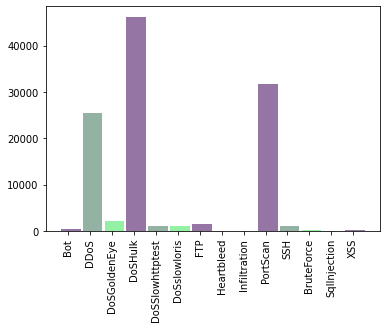

<Figure size 432x288 with 0 Axes>

In [ ]:
# distribution of each attack in the network and their occurence numbers
# Create bars
barWidth = 0.9
bars1 = len(YM_test_Bot)
bars2 = len(YM_test_DDoS)
bars3 = len(YM_test_DoSGoldenEye)
bars4 = len(YM_test_DoSHulk)
bars5 = len(YM_test_DoSSlowhttptest)
bars6 = len(YM_test_DoSslowloris)
bars7 = len(YM_test_FTP)
bars8 = len(YM_test_Heartbleed)
bars9 = len(YM_test_Infiltration)
bars10 = len(YM_test_PortScan)
bars11 = len(YM_test_SSH)
bars12 = len(YM_test_BruteForce)
bars13 = len(YM_test_SqlInjection)
bars14 = len(YM_test_XSS)


 
# The X position of bars
r1 = [1]
r2 = [2]
r3 = [3]
r4 = [4]
r5 = [5]
r6 = [6]
r7 = [7]
r8 = [8]
r9 = [9]
r10 = [10]
r11 = [11]
r12 = [12]
r13 = [13]
r14 = [14]
#r15 = r1 + r2 + r3 + r4 + r5 + r6 + r7 + r8 + r9 + r10 + r11 + r12 + r13 + r14
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Bot')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='DDoS')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='DoSGoldenEye')
plt.bar(r4, bars4, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DoSHulk')
plt.bar(r5, bars5, width = barWidth, color = (0.3,0.5,0.4,0.6), label='DoSSlowhttptest')
plt.bar(r6, bars6, width = barWidth, color = (0.3,0.9,0.4,0.6), label='DoSslowloris')
plt.bar(r7, bars7, width = barWidth, color = (0.3,0.1,0.4,0.6), label='FTP')
plt.bar(r8, bars8, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Heartbleed')
plt.bar(r9, bars9, width = barWidth, color = (0.3,0.9,0.4,0.6), label='Infiltration')
plt.bar(r10, bars10, width = barWidth, color = (0.3,0.1,0.4,0.6), label='PortScan')
plt.bar(r11, bars11, width = barWidth, color = (0.3,0.5,0.4,0.6), label='SSH')
plt.bar(r12, bars12, width = barWidth, color = (0.3,0.9,0.4,0.6), label='BruteForce')
plt.bar(r13, bars13, width = barWidth, color = (0.3,0.1,0.4,0.6), label='SqlInjection')
plt.bar(r14, bars14, width = barWidth, color = (0.3,0.1,0.4,0.6), label='XSS')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
#plt.legend()

# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(14)], ['Bot', 'DDoS', 'DoSGoldenEye','DoSHulk', 'DoSSlowhttptest', 'DoSslowloris', 'FTP', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH', 'BruteForce', 'SqlInjection','XSS'], rotation=90)

# Create labels
#label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each barplot
#for i in range(len(r15)):
#  plt.text(x = r15[i]-0.5 , y = bars15[i]+0.1, s = label[i], size = 6)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()

plt.savefig('ClaseAtacuri.jpeg')

In [ ]:
column_names = ['Bot', 'DDoS', 'DoSGoldenEye', 'DoSHulk', 'DoSSlowhttptest', 'DoSslowloris', 'FTP', 'Heartbleed', 'Infiltration', 'Portscan', 'SSH', 'Web-BruteForce', 'Web-SqlInjection', 'Web-XSS']
matrice_confuzie_test_LSVC.to_csv ('matrice_confuzie14_test_LSVC.csv', index = False, header=column_names)
matrice_confuzie_test_RF.to_csv ('matrice_confuzie14_test_RF.csv', index = False, header=column_names)

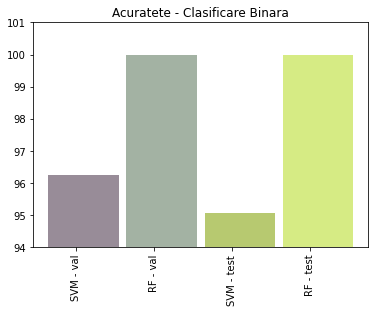

In [ ]:
# accuracy % for each algorithm on the validation set and testing set - binary classification
from sklearn.metrics import accuracy_score
barWidth = 0.9
bars1 = accuracy_score(y_actual_val, y_predict_val_bin)*100
bars2 = accuracy_score(y_actual_val, y_predict3_val_bin)*100
bars3 = accuracy_score(y_actual_test, y_predict_test_bin)*100
bars4 = accuracy_score(y_actual_test, y_predict3_test_bin)*100
y = []
y.append(bars1)
y.append(bars2)
y.append(bars3)
y.append(bars4)

r1 = [1]
r2 = [2]
r3 = [3]
r4 = [4]

plt.bar(r1, bars1, width = barWidth, color = (0.2,0.1,0.2,0.5), label='SVM - val')
plt.bar(r2, bars2, width = barWidth, color = (0.4,0.5,0.4,0.6), label='RF - val')
plt.bar(r3, bars3, width = barWidth, color = (0.6,0.7,0.2,0.7), label='SVM - test')
plt.bar(r4, bars4, width = barWidth, color = (0.8,0.9,0.4,0.8), label='RF - test')

plt.xticks([r + barWidth for r in range(4)], ['SVM - val','RF - val','SVM - test','RF - test'], rotation=90)
plt.ylim([94, 101])
plt.title("Acuratete - Clasificare Binara")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()

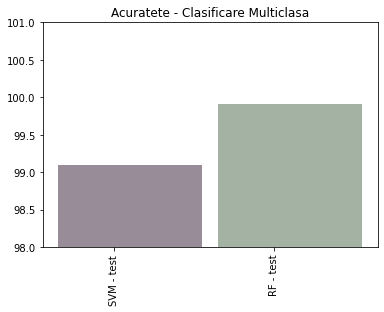

In [ ]:
# accuracy % for each algorithm on the testing set - multiclass classification
from sklearn.metrics import accuracy_score
barWidth = 0.9
bars1 = accuracy_score(y_actual_test_multiclass, y_predict2_test_multiclass)*100
bars2 = accuracy_score(y_actual_test_multiclass, y_predict3_test_multiclass)*100
y = []
y.append(bars1)
y.append(bars2)

r1 = [1]
r2 = [2]

plt.bar(r1, bars1, width = barWidth, color = (0.2,0.1,0.2,0.5), label='SVM - test')
plt.bar(r2, bars2, width = barWidth, color = (0.4,0.5,0.4,0.6), label='RF - test')

plt.xticks([r + barWidth for r in range(2)], ['SVM - test','RF - test'], rotation=90)
plt.ylim([98, 101])
plt.title("Acuratete - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

y_predict2_DDoS = model2.predict(XM_test_DDoS_normalized)

y_predict2_DoSHulk = model2.predict(XM_test_DoSHulk_normalized)

y_predict2_PortScan = model2.predict(XM_test_PortScan_normalized)

y_predict2_SqlInjection = model2.predict(XM_test_SqlInjection_normalized)


y_predict3_DDoS = model3.predict(XM_test_DDoS_normalized)

y_predict3_DoSHulk = model3.predict(XM_test_DoSHulk_normalized)

y_predict3_PortScan = model3.predict(XM_test_PortScan_normalized)

y_predict3_SqlInjection = model3.predict(XM_test_SqlInjection_normalized)

Masurile de performanta pentru cele 3 atacuri detectate cu SVM sunt:
Acuratete - DDoS:0.9991004028630657
Acuratete - DoSHulk:0.9910503391336382
Acuratete - PortScan:0.9989269370364526
Precizie - DDoS:1.0
Precizie - DoSHulk:1.0
Precizie - PortScan:1.0
Recall - DDoS:0.9991004028630657
Recall - DoSHulk:0.9910503391336382
Recall - PortScan:0.9989269370364526
-----------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


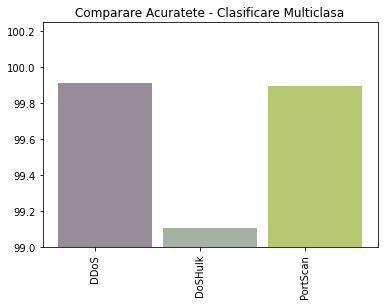

-----------------------------------------------------------------------


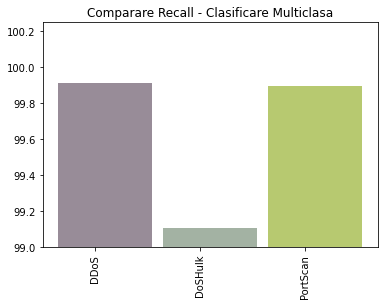

-----------------------------------------------------------------------


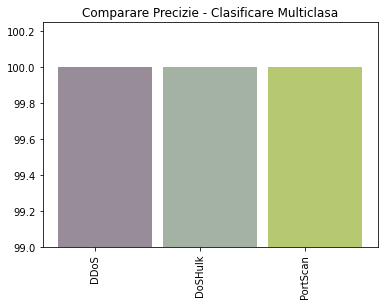

In [ ]:
# LinearSVC - comparing performace metrics(like accuracy, recall, precision) for the top 3 attacks from the dataset(those attacks had the biggest occurence in the network)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

acc2_DDoS = accuracy_score(YM_test_DDoS, y_predict2_DDoS)
acc2_DoSHulk = accuracy_score(YM_test_DoSHulk, y_predict2_DoSHulk)
acc2_PortScan = accuracy_score(YM_test_PortScan, y_predict2_PortScan)

prec2_DDoS = precision_score(YM_test_DDoS, y_predict2_DDoS, average='weighted')
prec2_DoSHulk = precision_score(YM_test_DoSHulk, y_predict2_DoSHulk,average='weighted')
prec2_PortScan = precision_score(YM_test_PortScan, y_predict2_PortScan,average='weighted')

rec2_DDoS = recall_score(YM_test_DDoS, y_predict2_DDoS, average='weighted')
rec2_DoSHulk = recall_score(YM_test_DoSHulk, y_predict2_DoSHulk, average='weighted')
rec2_PortScan = recall_score(YM_test_PortScan, y_predict2_PortScan, average='weighted')

print("Masurile de performanta pentru cele 3 atacuri detectate cu SVM sunt:")
print("Acuratete - DDoS:"+str(acc2_DDoS))
print("Acuratete - DoSHulk:"+str(acc2_DoSHulk))
print("Acuratete - PortScan:"+str(acc2_PortScan))
print("Precizie - DDoS:"+str(prec2_DDoS))
print("Precizie - DoSHulk:"+str(prec2_DoSHulk))
print("Precizie - PortScan:"+str(prec2_PortScan))
print("Recall - DDoS:"+str(rec2_DDoS))
print("Recall - DoSHulk:"+str(rec2_DoSHulk))
print("Recall - PortScan:"+str(rec2_PortScan))

print("-----------------------------------------------------------------------")
barWidth = 0.9
bars1 = acc2_DDoS*100
bars2 = acc2_DoSHulk*100
bars3 = acc2_PortScan*100
y = []
y.append(bars1)
y.append(bars2)
y.append(bars3)

r1 = [1]
r2 = [2]
r3 = [3]

plt.bar(r1, bars1, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS')
plt.bar(r2, bars2, width = barWidth, color = (0.4,0.5,0.4,0.6), label='DoSHulk')
plt.bar(r3, bars3, width = barWidth, color = (0.6,0.7,0.2,0.7), label='PortScan')

plt.xticks([r + barWidth for r in range(3)], ['DDoS','DoSHulk','PortScan'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Acuratete - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars111 = rec2_DDoS*100
bars222 = rec2_DoSHulk*100
bars333 = rec2_PortScan*100
y = []
y.append(bars111)
y.append(bars222)
y.append(bars333)

r111 = [1]
r222 = [2]
r333 = [3]

plt.bar(r111, bars111, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS')
plt.bar(r222, bars222, width = barWidth, color = (0.4,0.5,0.4,0.6), label='DoSHulk')
plt.bar(r333, bars333, width = barWidth, color = (0.6,0.7,0.2,0.7), label='PortScan')

plt.xticks([r + barWidth for r in range(3)], ['DDoS','DoSHulk','PortScan'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Recall - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars11 = prec2_DDoS*100
bars22 = prec2_DoSHulk*100
bars33 = prec2_PortScan*100
y = []
y.append(bars11)
y.append(bars22)
y.append(bars33)

r11 = [1]
r22 = [2]
r33 = [3]

plt.bar(r11, bars11, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS')
plt.bar(r22, bars22, width = barWidth, color = (0.4,0.5,0.4,0.6), label='DoSHulk')
plt.bar(r33, bars33, width = barWidth, color = (0.6,0.7,0.2,0.7), label='PortScan')

plt.xticks([r + barWidth for r in range(3)], ['DDoS','DoSHulk','PortScan'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Precizie - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()

Masurile de performanta pentru cele 3 atacuri detectate cu RF sunt:
Acuratete - DDoS:0.9999217741620057
Acuratete - DoSHulk:0.9999566602379353
Acuratete - PortScan:0.999652832570617
Precizie - DDoS:1.0
Precizie - DoSHulk:1.0
Precizie - PortScan:1.0
Recall - DDoS:0.9999217741620057
Recall - DoSHulk:0.9999566602379353
Recall - PortScan:0.999652832570617
-----------------------------------------------------------------------


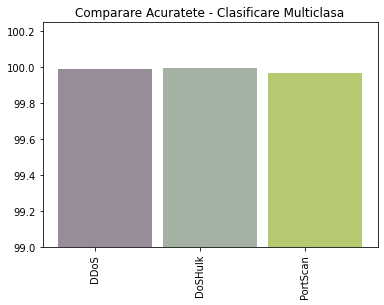

-----------------------------------------------------------------------


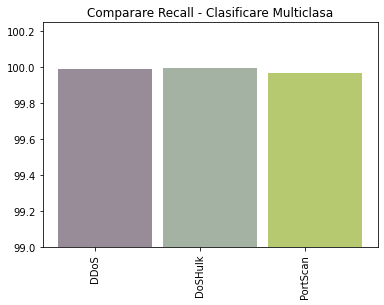

-----------------------------------------------------------------------


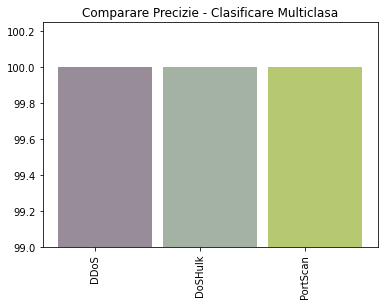

In [ ]:
# RandomForest - comparing performace metrics(like accuracy, recall, precision) for the top 3 attacks from the dataset(those attacks had the biggest occurence in the network)
acc3_DDoS = accuracy_score(YM_test_DDoS, y_predict3_DDoS)
acc3_DoSHulk = accuracy_score(YM_test_DoSHulk, y_predict3_DoSHulk)
acc3_PortScan = accuracy_score(YM_test_PortScan, y_predict3_PortScan)

prec3_DDoS = precision_score(YM_test_DDoS, y_predict3_DDoS, average='weighted')
prec3_DoSHulk = precision_score(YM_test_DoSHulk, y_predict3_DoSHulk,average='weighted')
prec3_PortScan = precision_score(YM_test_PortScan, y_predict3_PortScan,average='weighted')

rec3_DDoS = recall_score(YM_test_DDoS, y_predict3_DDoS, average='weighted', zero_division = 0)
rec3_DoSHulk = recall_score(YM_test_DoSHulk, y_predict3_DoSHulk, average='weighted', zero_division = 0)
rec3_PortScan = recall_score(YM_test_PortScan, y_predict3_PortScan, average='weighted', zero_division = 0)

print("Masurile de performanta pentru cele 3 atacuri detectate cu RF sunt:")
print("Acuratete - DDoS:"+str(acc3_DDoS))
print("Acuratete - DoSHulk:"+str(acc3_DoSHulk))
print("Acuratete - PortScan:"+str(acc3_PortScan))
print("Precizie - DDoS:"+str(prec3_DDoS))
print("Precizie - DoSHulk:"+str(prec3_DoSHulk))
print("Precizie - PortScan:"+str(prec3_PortScan))
print("Recall - DDoS:"+str(rec3_DDoS))
print("Recall - DoSHulk:"+str(rec3_DoSHulk))
print("Recall - PortScan:"+str(rec3_PortScan))

print("-----------------------------------------------------------------------")
barWidth = 0.9
bars1 = acc3_DDoS*100
bars2 = acc3_DoSHulk*100
bars3 = acc3_PortScan*100
y = []
y.append(bars1)
y.append(bars2)
y.append(bars3)

r1 = [1]
r2 = [2]
r3 = [3]

plt.bar(r1, bars1, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS')
plt.bar(r2, bars2, width = barWidth, color = (0.4,0.5,0.4,0.6), label='DoSHulk')
plt.bar(r3, bars3, width = barWidth, color = (0.6,0.7,0.2,0.7), label='PortScan')

plt.xticks([r + barWidth for r in range(3)], ['DDoS','DoSHulk','PortScan'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Acuratete - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars111 = rec3_DDoS*100
bars222 = rec3_DoSHulk*100
bars333 = rec3_PortScan*100
y = []
y.append(bars111)
y.append(bars222)
y.append(bars333)

r111 = [1]
r222 = [2]
r333 = [3]

plt.bar(r111, bars111, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS')
plt.bar(r222, bars222, width = barWidth, color = (0.4,0.5,0.4,0.6), label='DoSHulk')
plt.bar(r333, bars333, width = barWidth, color = (0.6,0.7,0.2,0.7), label='PortScan')

plt.xticks([r + barWidth for r in range(3)], ['DDoS','DoSHulk','PortScan'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Recall - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars11 = prec3_DDoS*100
bars22 = prec3_DoSHulk*100
bars33 = prec3_PortScan*100
y = []
y.append(bars11)
y.append(bars22)
y.append(bars33)

r11 = [1]
r22 = [2]
r33 = [3]

plt.bar(r11, bars11, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS')
plt.bar(r22, bars22, width = barWidth, color = (0.4,0.5,0.4,0.6), label='DoSHulk')
plt.bar(r33, bars33, width = barWidth, color = (0.6,0.7,0.2,0.7), label='PortScan')

plt.xticks([r + barWidth for r in range(3)], ['DDoS','DoSHulk','PortScan'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Precizie - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()

-----------------------------------------------------------------------


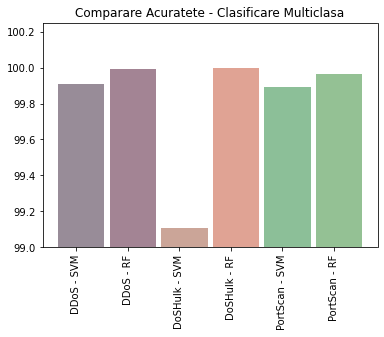

-----------------------------------------------------------------------


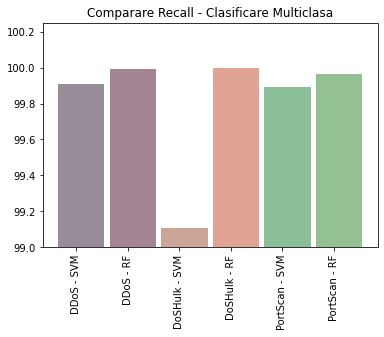

-----------------------------------------------------------------------


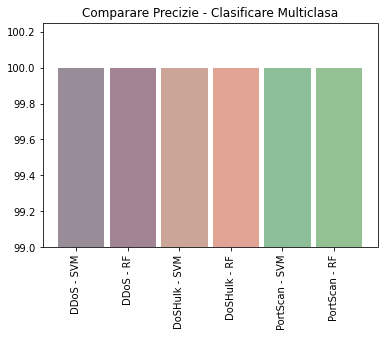

In [ ]:
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars1 = acc2_DDoS*100
bars2 = acc3_DDoS*100
bars3 = acc2_DoSHulk*100
bars4 = acc3_DoSHulk*100
bars5 = acc2_PortScan*100
bars6 = acc3_PortScan*100
y = []
y.append(bars1)
y.append(bars2)
y.append(bars3)
y.append(bars4)
y.append(bars5)
y.append(bars6)

r1 = [1]
r2 = [2]
r3 = [3]
r4 = [4]
r5 = [5]
r6 = [6]

plt.bar(r1, bars1, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS - SVM')
plt.bar(r2, bars2, width = barWidth, color = (0.4,0.2,0.3,0.6), label='DDoS - RF')
plt.bar(r3, bars3, width = barWidth, color = (0.6,0.3,0.2,0.5), label='DoSHulk - SVM')
plt.bar(r4, bars4, width = barWidth, color = (0.8,0.4,0.3,0.6), label='DoSHulk - RF')
plt.bar(r5, bars5, width = barWidth, color = (0.1,0.5,0.2,0.5), label='PortScan - SVM')
plt.bar(r6, bars6, width = barWidth, color = (0.3,0.6,0.3,0.6), label='PortScan - RF')
plt.xticks([r + barWidth for r in range(6)], ['DDoS - SVM','DDoS - RF','DoSHulk - SVM','DoSHulk - RF','PortScan - SVM','PortScan - RF'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Acuratete - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars11 = rec2_DDoS*100
bars21 = rec3_DDoS*100
bars31 = rec2_DoSHulk*100
bars41 = rec3_DoSHulk*100
bars51 = rec2_PortScan*100
bars61 = rec3_PortScan*100
y = []
y.append(bars11)
y.append(bars21)
y.append(bars31)
y.append(bars41)
y.append(bars51)
y.append(bars61)

r11 = [1]
r21 = [2]
r31 = [3]
r41 = [4]
r51 = [5]
r61 = [6]

plt.bar(r11, bars11, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS - SVM')
plt.bar(r21, bars21, width = barWidth, color = (0.4,0.2,0.3,0.6), label='DDoS - RF')
plt.bar(r31, bars31, width = barWidth, color = (0.6,0.3,0.2,0.5), label='DoSHulk - SVM')
plt.bar(r41, bars41, width = barWidth, color = (0.8,0.4,0.3,0.6), label='DoSHulk - RF')
plt.bar(r51, bars51, width = barWidth, color = (0.1,0.5,0.2,0.5), label='PortScan - SVM')
plt.bar(r61, bars61, width = barWidth, color = (0.3,0.6,0.3,0.6), label='PortScan - RF')
plt.xticks([r + barWidth for r in range(6)], ['DDoS - SVM','DDoS - RF','DoSHulk - SVM','DoSHulk - RF','PortScan - SVM','PortScan - RF'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Recall - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()
print("-----------------------------------------------------------------------")
barWidth = 0.9
bars12 = prec2_DDoS*100
bars22 = prec3_DDoS*100
bars32 = prec2_DoSHulk*100
bars42 = prec3_DoSHulk*100
bars52 = prec2_PortScan*100
bars62 = prec3_PortScan*100
y = []
y.append(bars12)
y.append(bars22)
y.append(bars32)
y.append(bars42)
y.append(bars52)
y.append(bars62)

r12 = [1]
r22 = [2]
r32 = [3]
r42 = [4]
r52 = [5]
r62 = [6]

plt.bar(r12, bars12, width = barWidth, color = (0.2,0.1,0.2,0.5), label='DDoS - SVM')
plt.bar(r22, bars22, width = barWidth, color = (0.4,0.2,0.3,0.6), label='DDoS - RF')
plt.bar(r32, bars32, width = barWidth, color = (0.6,0.3,0.2,0.5), label='DoSHulk - SVM')
plt.bar(r42, bars42, width = barWidth, color = (0.8,0.4,0.3,0.6), label='DoSHulk - RF')
plt.bar(r52, bars52, width = barWidth, color = (0.1,0.5,0.2,0.5), label='PortScan - SVM')
plt.bar(r62, bars62, width = barWidth, color = (0.3,0.6,0.3,0.6), label='PortScan - RF')
plt.xticks([r + barWidth for r in range(6)], ['DDoS - SVM','DDoS - RF','DoSHulk - SVM','DoSHulk - RF','PortScan - SVM','PortScan - RF'], rotation=90)
plt.ylim([99, 100.25])
plt.title("Comparare Precizie - Clasificare Multiclasa")
# Adjust the margins

plt.subplots_adjust(bottom= 0.2, top = 0.98)

# Show graphic
plt.show()

In [ ]:
print("--------------------------------------------------------------------------------------------")
print("OTHER METHODS APPLIED WERE APPLIED DOWN")
print("--------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------


In [ ]:
print("-------------------------------------------------------\n")
column_names = df[' Label']
print(column_names)
print(df)

-------------------------------------------------------

0          BENIGN
1          BENIGN
2          BENIGN
3          BENIGN
4          BENIGN
            ...  
3119340    BENIGN
3119341    BENIGN
3119342    BENIGN
3119343    BENIGN
3119344    BENIGN
Name:  Label, Length: 3119345, dtype: object
                                          Flow ID  ...   Label
0         192.168.10.5-104.16.207.165-54865-443-6  ...  BENIGN
1           192.168.10.5-104.16.28.216-55054-80-6  ...  BENIGN
2           192.168.10.5-104.16.28.216-55055-80-6  ...  BENIGN
3         192.168.10.16-104.17.241.25-46236-443-6  ...  BENIGN
4         192.168.10.5-104.19.196.102-54863-443-6  ...  BENIGN
...                                           ...  ...     ...
3119340    192.168.10.3-192.168.10.14-53-51114-17  ...  BENIGN
3119341    192.168.10.3-192.168.10.16-53-24054-17  ...  BENIGN
3119342  192.168.10.51-23.208.163.130-58030-443-6  ...  BENIGN
3119343    192.168.10.3-192.168.10.14-53-51694-17  ...  BENIGN
3119344

In [ ]:
copy_df = df.copy()
#column_names = df[' Label']
le = LabelEncoder()
df['Flow ID'] = le.fit_transform(df['Flow ID'].astype(str))
#df['Source Port'] = le.fit_transform(df[' Source Port'].astype(str))
df['Label_Category'] = le.fit_transform(df[' Label'].astype(str))
#, ' Source Port'
df = df.drop([' Source IP',' Destination IP',' Timestamp',' Label'],axis=1)

In [ ]:
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)].astype(np.float64)
df = shuffle(df)
print(df)

          Flow ID   Source Port  ...    Idle Min  Label_Category
2588277  113515.0       37982.0  ...  98700000.0             4.0
622649   296049.0        4023.0  ...  57900000.0             0.0
1044820  647440.0       51182.0  ...         0.0             0.0
872515   932426.0       62664.0  ...         0.0             0.0
1356002  370881.0       54405.0  ...   9959991.0             0.0
...           ...           ...  ...         ...             ...
2078455  942623.0       55351.0  ...   5087538.0             0.0
213005   374647.0       61768.0  ...         0.0             0.0
18601    638547.0       60539.0  ...         0.0             0.0
2459462  542902.0         123.0  ...         0.0             0.0
1418361  998087.0       61049.0  ...         0.0             0.0

[2827876 rows x 82 columns]


In [ ]:
X = df[df['Label_Category']!=0]
df_test = df[0:int(len(df)/7)]
df = df[int(len(df)/7+1):]
x_test = df_test
y_test = x_test['Label_Category']

In [ ]:
idx = df.index[df['Label_Category']==0]
print(len(idx))
idx2 = df.index[df['Label_Category']!=0]
print(len(idx2))

1946918
476975


In [ ]:
df.drop(axis=0, index=idx[0:int(len(idx)-len(idx)/2)], inplace=True)
#df.drop(axis=0, index=idx[0:int(len(idx)-len(idx)/6)], inplace=True)

In [ ]:
idx3 = df.index[df['Label_Category']==0]
df.drop(axis=0, index=idx3[0:int(len(idx3)-len(idx3)/2)], inplace=True)

In [ ]:
print(len(df[df['Label_Category']==0]))#Benign
print(len(df[df['Label_Category']!=0]))#Malign
print(len(df[df['Label_Category']==1]))#Bot
print(len(df[df['Label_Category']==2]))#DDoS
print(len(df[df['Label_Category']==3]))#DoSGoldenEye
print(len(df[df['Label_Category']==4]))#DoSHulk
print(len(df[df['Label_Category']==5]))#DoSSlowhttptest
print(len(df[df['Label_Category']==6]))#DoSslowloris
print(len(df[df['Label_Category']==7]))#FTP
print(len(df[df['Label_Category']==8]))#Heartbleed
print(len(df[df['Label_Category']==9]))#Infiltration
print(len(df[df['Label_Category']==10]))#Portscan
print(len(df[df['Label_Category']==11]))#SSH
print(len(df[df['Label_Category']==12]))#BruteForce
print(len(df[df['Label_Category']==13]))#SqlInjection
print(len(df[df['Label_Category']==14]))#XSS
df.describe()

486730
476975
1645
109624
8779
197441
4719
4896
6798
9
32
136108
5036
1303
19
566


,Flow ID,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_Category
count,9.637050e+05,963705.000000,963705.000000,963705.000000,9.637050e+05,963705.000000,963705.000000,9.637050e+05,9.637050e+05,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,963705.000000,963705.0,963705.000000,963705.0,9.637050e+05,9.637050e+05,9.637050e+05,...,963705.000000,963705.000000,9.637050e+05,9.637050e+05,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,963705.000000,9.637050e+05,9.637050e+05,963705.0,963705.0,963705.0,963705.0,963705.0,963705.0,963705.000000,9.637050e+05,963705.000000,9.637050e+05,963705.000000,963705.000000,963705.000000,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,9.637050e+05,963705.000000
mean,3.800505e+05,43281.559748,6012.449582,8.440127,2.022972e+07,7.511263,7.929916,4.314699e+02,1.228655e+04,173.058506,12.540784,76.802523,60.265829,1590.888519,26.513081,6.244432e+02,6.595681e+02,8.410054e+06,8.542349e+04,1.000007e+07,2.057717e+07,1.632672e+07,1.817005e+05,1.995636e+07,1.514247e+07,2.260426e+07,1.620790e+07,8.251966e+05,9.516362e+06,1.348275e+07,1.446655e+07,6.101101e+06,7.217385e+05,0.033605,0.0,0.000081,0.0,-1.164765e+04,-1.268175e+03,7.751711e+04,...,1642.479772,328.968517,5.208473e+02,1.833654e+06,0.061553,0.033605,0.000135,0.359195,0.358937,0.062801,0.000081,0.000136,0.657101,369.459153,76.802523,6.244432e+02,-1.164765e+04,0.0,0.0,0.0,0.0,0.0,0.0,7.511263,4.314391e+02,7.929916,1.228633e+04,7142.837865,1358.225974,3.739907,-1.609848e+03,2.545073e+05,8.146908e+05,1.392008e+05,6.950200e+04,2.372659e+07,1.724222e+06,1.591545e+07,1.460414e+07,2.675294
std,2.852519e+05,19013.152586,15555.635647,4.574210,3.779579e+07,604.311082,811.783704,1.474260e+04,1.800666e+06,580.539456,54.918695,2403.231595,226.279846,2769.382717,58.489330,8.931555e+03,1.952626e+03,1.150245e+08,2.084941e+06,1.673117e+08,2.518268e+08,3.319500e+07,3.271258e+06,3.777129e+07,2.568298e+08,2.650810e+08,3.325967e+07,7.859879e+06,2.811697e+07,2.691785e+08,2.374038e+08,2.118342e+07,7.199142e+06,0.180209,0.0,0.008996,0.0,9.908970e+06,1.107165e+06,2.083862e+06,...,2792.862966,4499.850707,1.879934e+03,3.691946e+07,0.240342,0.180209,0.011614,0.479765,0.479689,0.242605,0.008996,0.011658,0.639815,4812.690585,2403.231595,8.931555e+03,9.908970e+06,0.0,0.0,0.0,0.0,0.0,0.0,604.311082,1.471568e+04,811.783704,1.800659e+06,13409.09483

In [ ]:
dx = df.copy()
x = dx.copy()
#y = dx['Label_Category']
#X = dx[dx['Label_Category']!=0]


print(x)
#x.loc[x['Label_Category'] > 0, 'Label_Category'] = 1
y = x['Label_Category']
print(x)
print(y)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)


#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2
print('----------------------------------------------------------------')
print(len(x_train))
print(len(x_val))
print(len(x_test))
print('----------------------------------------------------------------')
x_train = x_train.drop(['Label_Category'],axis=1)

          Flow ID   Source Port  ...    Idle Min  Label_Category
2584662   79363.0       33234.0  ...  98600000.0             4.0
2165613  193382.0       51092.0  ...         0.0            11.0
494582   170223.0       46785.0  ...         0.0            10.0
2521782  116434.0       38468.0  ...  16000000.0             4.0
367992   271887.0       64915.0  ...         0.0            10.0
...           ...           ...  ...         ...             ...
2078455  942623.0       55351.0  ...   5087538.0             0.0
213005   374647.0       61768.0  ...         0.0             0.0
18601    638547.0       60539.0  ...         0.0             0.0
2459462  542902.0         123.0  ...         0.0             0.0
1418361  998087.0       61049.0  ...         0.0             0.0

[963705 rows x 82 columns]
          Flow ID   Source Port  ...    Idle Min  Label_Category
2584662   79363.0       33234.0  ...  98600000.0             4.0
2165613  193382.0       51092.0  ...         0.0            11

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(819149, 81)
(144556, 82)
(403982, 82)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_normalized = scaler.fit_transform(x_train)
#penalty='l2', loss='squared_hinge', dual=False,
#model = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.00001, C=1, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=0, max_iter=10000)
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(x_train_normalized, y_train) #train your model
model_rf = RandomForestClassifier(n_estimators=5)
model_rf.fit(x_train_normalized, y_train) #train your model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#SET DE VALIDARE
x_val_BENIGN = x_val[x_val['Label_Category']==0]
x_val_BENIGN = x_val_BENIGN.drop(['Label_Category'],axis=1)

x_val_MALIGN = x_val[x_val['Label_Category']!=0]
x_val_MALIGN = x_val_MALIGN.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
y_val_BENIGN = y_val[y_val==0]
y_val_MALIGN = y_val[y_val!=0]
#---------------------------------------------------------------------------------------------------------------

x_val_normalized_B = scaler.transform(x_val_BENIGN)
x_val_normalized_M = scaler.transform(x_val_MALIGN)

In [ ]:
benign_gini = model_gini.score(x_val_normalized_B, y_val_BENIGN)
benign_gini *= 100
print('Benign DecisionTreeClassifier_gini - set validare: '+str(benign_gini)+"%")

malign_gini = model_gini.score(x_val_normalized_M, y_val_MALIGN)

malign_gini *= 100
print('Malign DecisionTreeClassifier_gini - set validare: '+str(malign_gini)+"%")
#--------------------------------------------------------
benign_rf = model_rf.score(x_val_normalized_B, y_val_BENIGN)
benign_rf *= 100
print('Benign RandomForest - set validare: '+str(benign_rf)+"%")

malign_rf = model_rf.score(x_val_normalized_M, y_val_MALIGN)

malign_rf *= 100
print('Malign RandomForest - set validare: '+str(malign_rf)+"%")

Benign DecisionTreeClassifier_gini - set validare: 99.99179790026247%
Malign DecisionTreeClassifier_gini - set validare: 99.90896868522772%
Benign RandomForest - set validare: 99.99043088363955%
Malign RandomForest - set validare: 99.81373592515826%


In [ ]:
y_actual_val = y_val.copy()
x_val_matrix = x_val.drop(['Label_Category'], axis=1)
x_val_matrix = scaler.transform(x_val_matrix)
y_predict_val_bin_gini = pd.DataFrame(model_gini.predict(x_val_matrix))
y_predict_val_bin_rf = pd.DataFrame(model_rf.predict(x_val_matrix))

In [ ]:
coloane = []
matrice_confuzie_validare_CART_gini = pd.DataFrame(confusion_matrix(y_actual_val, y_predict_val_bin_gini))
print("MATRICE CONFUZIE VALIDARE - DecisionTreeClassifier_gini: "+str(len(y_predict_val_bin_gini)))
print(matrice_confuzie_validare_CART_gini)
print('----------------------------------------------------------------------')
matrice_confuzie_validare_CART_rf = pd.DataFrame(confusion_matrix(y_actual_val, y_predict_val_bin_rf))
print("MATRICE CONFUZIE VALIDARE - RandomForest: "+str(len(y_predict_val_bin_rf)))
print(matrice_confuzie_validare_CART_rf)

MATRICE CONFUZIE VALIDARE - DecisionTreeClassifier_gini: 144556
       0    1      2     3      4    5    6   ...  8   9      10   11   12  13  14
0   73146    2      0     0      1    0    1  ...   0   0      1    0    1   0   0
1       0  259      0     0      0    0    0  ...   0   0      0    0    0   0   0
2       0    0  16392     0      0    0    0  ...   0   0      0    0    0   0   0
3       0    0      0  1342      2    0    0  ...   0   0      0    0    0   0   0
4       0    0      0     2  29410    0    0  ...   0   0      5    0    1   0   0
5       1    0      0     0      0  711    0  ...   0   0      0    0    1   0   0
6       0    0      1     1      0    1  744  ...   0   0      0    0    0   0   1
7       0    0      0     0      0    0    0  ...   0   0      0    0    0   0   0
8       0    0      0     0      0    0    0  ...   1   0      0    0    0   0   0
9       0    0      0     0      0    0    0  ...   0   3      0    0    0   0   0
10      0    0      0  

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

print('----------------------------------------------------------------------')
print("Raport de clasificare - GINI")
report_gini = classification_report(y_actual_val, y_predict_val_bin_gini, labels=[0, 1], output_dict=True)
report_tabel_gini = pd.DataFrame(report_gini).transpose()
print(report_tabel_gini)
print('----------------------------------------------------------------------')
print("Raport de clasificare - RandomForest")
report_rf = classification_report(y_actual_val, y_predict_val_bin_rf, labels=[0, 1], output_dict=True)
report_tabel_rf = pd.DataFrame(report_rf).transpose()
print(report_tabel_rf)
print('----------------------------------------------------------------------')
print("\n")

----------------------------------------------------------------------
Raport de clasificare - GINI
              precision    recall  f1-score  support
0              0.999986  0.999918  0.999952  73152.0
1              0.992337  1.000000  0.996154    259.0
micro avg      0.999959  0.999918  0.999939  73411.0
macro avg      0.996162  0.999959  0.998053  73411.0
weighted avg   0.999959  0.999918  0.999939  73411.0
----------------------------------------------------------------------
Raport de clasificare - RandomForest
              precision    recall  f1-score  support
0              0.999085  0.999904  0.999494  73152.0
1              0.976077  0.787645  0.871795    259.0
micro avg      0.999019  0.999155  0.999087  73411.0
macro avg      0.987581  0.893775  0.935645  73411.0
weighted avg   0.999004  0.999155  0.999044  73411.0
----------------------------------------------------------------------




In [ ]:
x_test.loc[x_test['Label_Category'] > 0, 'Label_Category'] = 1
y_test = x_test['Label_Category']
#SET DE TEST
x_test_BENIGN = x_test[x_test['Label_Category']==0]
x_test_BENIGN = x_test_BENIGN.drop(['Label_Category'],axis=1)

x_test_MALIGN = x_test[x_test['Label_Category']!=0]
x_test_MALIGN = x_test_MALIGN.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
y_test_BENIGN = y_test[y_test==0]
y_test_MALIGN = y_test[y_test!=0]
#---------------------------------------------------------------------------------------------------------------
x_test_normalized_B = scaler.transform(x_test_BENIGN)
x_test_normalized_M = scaler.transform(x_test_MALIGN)

benign_test_gini = model_gini.score(x_test_normalized_B, y_test_BENIGN)
benign_test_rf = model_rf.score(x_test_normalized_B, y_test_BENIGN)
benign_test_gini *= 100
benign_test_rf *= 100
print('Benign GINI- set testare: '+str(benign_test_gini)+"%")
print('Benign RF - set testare: '+str(benign_test_rf)+"%")


malign_test_gini = model_gini.score(x_test_normalized_M, y_test_MALIGN)
malign_test_rf = model_rf.score(x_test_normalized_M, y_test_MALIGN)
malign_test_gini *= 100
malign_test_rf *= 100
print('Malign GINI- set testare: '+str(malign_test_gini)+"%")
print('Malign RandomForest - set testare: '+str(malign_test_rf)+"%")

print('\n')
y_actual_test = y_test
x_test_matrix = x_test.drop(['Label_Category'], axis=1)
x_test_matrix = scaler.transform(x_test_matrix)
y_predict_test_bin_gini= model_gini.predict(x_test_matrix)
y_predict_test_bin_rf = model_rf.predict(x_test_matrix)

matrice_confuzie_test_gini = pd.DataFrame(confusion_matrix(y_actual_test, y_predict_test_bin_gini))
print("MATRICE CONFUZIE TEST - GINI: "+str(len(y_predict_test_bin_gini)))
print(matrice_confuzie_test_gini)
matrice_confuzie_test_rf = pd.DataFrame(confusion_matrix(y_actual_test, y_predict_test_bin_rf))
print('--------------------------------------------------------\n')
print("MATRICE CONFUZIE TEST - RandomForest: "+str(len(y_predict_test_bin_rf)))
print(matrice_confuzie_test_rf)

Benign GINI- set testare: 99.98705306087219%
Benign RF - set testare: 99.99075218633729%
Malign GINI- set testare: 0.3895402168859401%
Malign RandomForest - set testare: 0.3241979869566856%


MATRICE CONFUZIE TEST - GINI: 403982
        0    1      2     3      4    5    6   ...  8   9      10   11   12  13   14
0   324359   15      2     0      4    2    1  ...   0   4      8    1    0   1    1
1        2  310  18402  1514  32685  785  896  ...   2   4  22695  861  187   2  100
2        0    0      0     0      0    0    0  ...   0   0      0    0    0   0    0
3        0    0      0     0      0    0    0  ...   0   0      0    0    0   0    0
4        0    0      0     0      0    0    0  ...   0   0      0    0    0   0    0
5        0    0      0     0      0    0    0  ...   0   0      0    0    0   0    0
6        0    0      0     0      0    0    0  ...   0   0      0    0    0   0    0
7        0    0      0     0      0    0    0  ...   0   0      0    0    0   0    0
8     

----------------------------------------------------------------------
Raport de clasificare - GINI
              precision    recall  f1-score   support
0              0.999994  0.999871  0.999932  324401.0
1              0.953846  0.003895  0.007759   79581.0
micro avg      0.999948  0.803672  0.891130  403982.0
macro avg      0.976920  0.501883  0.503846  403982.0
weighted avg   0.990903  0.803672  0.804483  403982.0
----------------------------------------------------------------------


----------------------------------------------------------------------
Raport de clasificare - RandomForest
              precision    recall  f1-score   support
0              0.999772  0.999908  0.999840  324401.0
1              0.931408  0.003242  0.006461   79581.0
micro avg      0.999714  0.803573  0.890976  403982.0
macro avg      0.965590  0.501575  0.503151  403982.0
weighted avg   0.986305  0.803573  0.804153  403982.0
----------------------------------------------------------------------


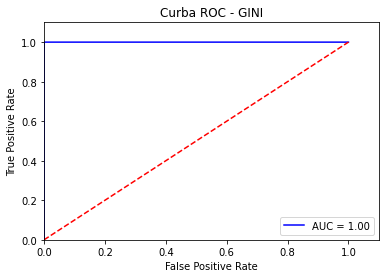

--------------------------------------------------RF


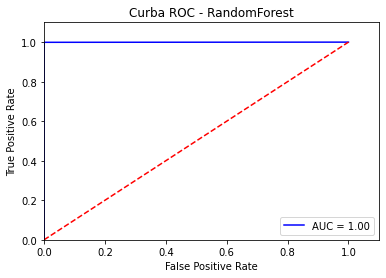

In [ ]:
print('----------------------------------------------------------------------')
print("Raport de clasificare - GINI")
report_gini = classification_report(y_actual_test, y_predict_test_bin_gini, labels=[0, 1], output_dict=True)
report_tabel_gini = pd.DataFrame(report_gini).transpose()
print(report_tabel_gini)
print('----------------------------------------------------------------------')
print("\n")
print('----------------------------------------------------------------------')
print("Raport de clasificare - RandomForest")
report_rf = classification_report(y_actual_test, y_predict_test_bin_rf, labels=[0, 1], output_dict=True)
report_tabel_rf = pd.DataFrame(report_rf).transpose()
print(report_tabel_rf)
print('----------------------------------------------------------------------')
fpr, tpr, threshold = metrics.roc_curve(y_actual_test, y_predict_test_bin_gini)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curba ROC - GINI')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('--------------------------------------------------RF')
fpr, tpr, threshold = metrics.roc_curve(y_actual_test, y_predict_test_bin_rf)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curba ROC - RandomForest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Y = X['Label_Category']
XM_train, XM_test, YM_train, YM_test = train_test_split(X,Y,test_size=0.2,random_state=42)

XM_train = XM_train.drop(['Label_Category'],axis=1)

XM_test_Bot = XM_test[XM_test['Label_Category']==1]
XM_test_Bot = XM_test_Bot.drop(['Label_Category'],axis=1)

XM_test_DDoS = XM_test[XM_test['Label_Category']==2]
XM_test_DDoS = XM_test_DDoS.drop(['Label_Category'],axis=1)

XM_test_DoSGoldenEye = XM_test[XM_test['Label_Category']==3]
XM_test_DoSGoldenEye = XM_test_DoSGoldenEye.drop(['Label_Category'],axis=1)

XM_test_DoSHulk = XM_test[XM_test['Label_Category']==4]
XM_test_DoSHulk = XM_test_DoSHulk.drop(['Label_Category'],axis=1)

XM_test_DoSSlowhttptest = XM_test[XM_test['Label_Category']==5]
XM_test_DoSSlowhttptest = XM_test_DoSSlowhttptest.drop(['Label_Category'],axis=1)

XM_test_DoSslowloris = XM_test[XM_test['Label_Category']==6]
XM_test_DoSslowloris = XM_test_DoSslowloris.drop(['Label_Category'],axis=1)

XM_test_FTP = XM_test[XM_test['Label_Category']==7]
XM_test_FTP = XM_test_FTP.drop(['Label_Category'],axis=1)

XM_test_SSH = XM_test[XM_test['Label_Category']==11]
XM_test_SSH = XM_test_SSH.drop(['Label_Category'],axis=1)

XM_test_Heartbleed = XM_test[XM_test['Label_Category']==8]
XM_test_Heartbleed = XM_test_Heartbleed.drop(['Label_Category'],axis=1)

XM_test_Infiltration = XM_test[XM_test['Label_Category']==9]
XM_test_Infiltration = XM_test_Infiltration.drop(['Label_Category'],axis=1)

XM_test_PortScan = XM_test[XM_test['Label_Category']==10]
XM_test_PortScan = XM_test_PortScan.drop(['Label_Category'],axis=1)

XM_test_BruteForce = XM_test[XM_test['Label_Category']==12]
XM_test_BruteForce = XM_test_BruteForce.drop(['Label_Category'],axis=1)

XM_test_SqlInjection = XM_test[XM_test['Label_Category']==13]
XM_test_SqlInjection = XM_test_SqlInjection.drop(['Label_Category'],axis=1)

XM_test_XSS = XM_test[XM_test['Label_Category']==14]
XM_test_XSS = XM_test_XSS.drop(['Label_Category'],axis=1)
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
YM_test_XSS = YM_test[YM_test==14]
YM_test_SqlInjection = YM_test[YM_test==13]
YM_test_BruteForce = YM_test[YM_test==12]
YM_test_PortScan = YM_test[YM_test==10]
YM_test_BENIGN = YM_test[YM_test==0]
YM_test_MALIGN = YM_test[YM_test!=0]
YM_test_Bot = YM_test[YM_test==1]
YM_test_DDoS = YM_test[YM_test==2]
YM_test_DoSGoldenEye = YM_test[YM_test==3]
YM_test_DoSHulk = YM_test[YM_test==4]
YM_test_DoSSlowhttptest = YM_test[YM_test==5]
YM_test_DoSslowloris = YM_test[YM_test==6]
YM_test_FTP = YM_test[YM_test==7]
YM_test_SSH = YM_test[YM_test==11]
YM_test_Heartbleed = YM_test[YM_test==8]
YM_test_Infiltration = YM_test[YM_test==9]

In [ ]:
scaler_2 = MinMaxScaler()
scaler_2.fit(XM_train)
XM_train_normalized = scaler_2.fit_transform(XM_train)

model_gini2 = DecisionTreeClassifier(criterion='gini')
model_gini2.fit(XM_train_normalized, YM_train)

model3 = RandomForestClassifier(n_estimators=5)
model3.fit(XM_train_normalized, YM_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from statistics import mean
GINI = []
RF = []

XM_test_Bot_normalized = scaler_2.transform(XM_test_Bot)
#bot = model.score(XM_test_Bot_normalized, YM_test_Bot)
bot_gini2 = model_gini2.score(XM_test_Bot_normalized, YM_test_Bot)
bot3 = model3.score(XM_test_Bot_normalized, YM_test_Bot)
#SVC.append(bot)
GINI.append(bot_gini2)
RF.append(bot_entropy3)
#print('Bot(SVC): '+str(bot))
print('Bot2(_gini): '+str(bot_gini2))
print('Bot3(RF): '+str(bot3))
print('\n')

XM_test_DDoS_normalized = scaler_2.transform(XM_test_DDoS)
DDoS_gini2 = model_gini2.score(XM_test_DDoS_normalized, YM_test_DDoS)
DDoS3 = model3.score(XM_test_DDoS_normalized, YM_test_DDoS)
GINI.append(DDoS_gini2)
RF.append(DDoS3)
print('DDoS2(_gini): '+str(DDoS_gini2))
print('DDoS3(RF): '+str(DDoS3))
print('\n')

XM_test_DoSGoldenEye_normalized = scaler_2.transform(XM_test_DoSGoldenEye)
#DoSGoldenEye = model.score(XM_test_DoSGoldenEye_normalized, YM_test_DoSGoldenEye)
DoSGoldenEye_gini2 = model_gini2.score(XM_test_DoSGoldenEye_normalized, YM_test_DoSGoldenEye)
DoSGoldenEye3 = model3.score(XM_test_DoSGoldenEye_normalized, YM_test_DoSGoldenEye)
#SVC.append(DoSGoldenEye)
GINI.append(DoSGoldenEye_gini2)
RF.append(DoSGoldenEye3)
#print('DoSGoldenEye(SVC): '+str(DoSGoldenEye))
print('DoSGoldenEye2(_gini): '+str(DoSGoldenEye_gini2))
print('DoSGoldenEye3(RF): '+str(DoSGoldenEye3))
print('\n')

XM_test_DoSSlowhttptest_normalized = scaler_2.transform(XM_test_DoSSlowhttptest)
DoSSlowhttptest_gini2 = model_gini2.score(XM_test_DoSSlowhttptest_normalized, YM_test_DoSSlowhttptest)
DoSSlowhttptest3 = model3.score(XM_test_DoSSlowhttptest_normalized, YM_test_DoSSlowhttptest)
GINI.append(DoSSlowhttptest_gini2)
RF.append(DoSSlowhttptest3)
print('DoSSlowhttptest2(_gini): '+str(DoSSlowhttptest_gini2))
print('DoSSlowhttptest3(RF): '+str(DoSSlowhttptest3))
print('\n')

XM_test_DoSHulk_normalized = scaler_2.transform(XM_test_DoSHulk)
DoSHulk_gini2 = model_gini2.score(XM_test_DoSHulk_normalized, YM_test_DoSHulk)
DoSHulk3 = model3.score(XM_test_DoSHulk_normalized, YM_test_DoSHulk)
GINI.append(DoSHulk_gini2)
RF.append(DoSHulk3)
print('DoSHulk2(_gini): '+str(DoSHulk_gini2))
print('DoSHulk3(RF): '+str(DoSHulk3))
print('\n')

XM_test_DoSslowloris_normalized = scaler_2.transform(XM_test_DoSslowloris)
DoSslowloris_gini2 = model_gini2.score(XM_test_DoSslowloris_normalized, YM_test_DoSslowloris)
DoSslowloris3 = model3.score(XM_test_DoSslowloris_normalized, YM_test_DoSslowloris)
GINI.append(DoSslowloris_gini2)
RF.append(DoSslowloris3)
print('DoSslowloris2(_gini): '+str(DoSslowloris_gini2))
print('DoSslowloris3(RF): '+str(DoSslowloris3))
print('\n')

XM_test_FTP_normalized = scaler_2.transform(XM_test_FTP)
FTP_gini2 = model_gini2.score(XM_test_FTP_normalized , YM_test_FTP)
FTP3 = model3.score(XM_test_FTP_normalized , YM_test_FTP)
GINI.append(FTP_gini2)
RF.append(FTP3)
print('FTP_Patator2(_gini): '+str(FTP_gini2))
print('FTP_Patator3(RF): '+str(FTP3))
print('\n')

XM_test_SSH_normalized = scaler_2.transform(XM_test_SSH)
SSH_gini2 = model_gini2.score(XM_test_SSH_normalized, YM_test_SSH)
SSH3 = model3.score(XM_test_SSH_normalized, YM_test_SSH)
GINI.append(SSH_gini2)
RF.append(SSH3)
print('SSH_Patator2(_gini): '+str(SSH_gini2))
print('SSH_Patator3(RF): '+str(SSH3))
print('\n')

XM_test_Heartbleed_normalized = scaler_2.transform(XM_test_Heartbleed)
Heartbleed_gini2 = model_gini2.score(XM_test_Heartbleed_normalized, YM_test_Heartbleed)
Heartbleed3 = model3.score(XM_test_Heartbleed_normalized, YM_test_Heartbleed)
GINI.append(Heartbleed_gini2)
RF.append(Heartbleed3)
print('Heartbleed2(_gini): '+str(Heartbleed_gini2))
print('Heartbleed3(RF): '+str(Heartbleed3))
print('\n')

XM_test_Infiltration_normalized = scaler_2.transform(XM_test_Infiltration)
Infiltration_gini2 = model_gini2.score(XM_test_Infiltration_normalized, YM_test_Infiltration)
Infiltration3 = model3.score(XM_test_Infiltration_normalized, YM_test_Infiltration)
GINI.append(Infiltration_gini2)
RF.append(Infiltration3)
#print('Infiltration(SVC): '+str(Infiltration))
print('Infiltration2(_gini): '+str(Infiltration_gini2))
print('Infiltration3(RF): '+str(Infiltration3))
print('\n')

XM_test_PortScan_normalized = scaler_2.transform(XM_test_PortScan)
#PortScan = model.score(XM_test_PortScan_normalized, YM_test_PortScan)
PortScan_gini2 = model_gini2.score(XM_test_PortScan_normalized, YM_test_PortScan)
PortScan3 = model3.score(XM_test_PortScan_normalized, YM_test_PortScan)
#SVC.append(PortScan)
GINI.append(PortScan_gini2)
RF.append(PortScan3)
#print('PortScan(SVC): '+str(PortScan))
print('PortScan2(_gini): '+str(PortScan_gini2))
print('PortScan3(RF): '+str(PortScan3))
print('\n')

XM_test_BruteForce_normalized = scaler_2.transform(XM_test_BruteForce)
#BruteForce = model.score(XM_test_BruteForce_normalized, YM_test_BruteForce)
BruteForce_gini2 = model_gini2.score(XM_test_BruteForce_normalized, YM_test_BruteForce)
BruteForce3 = model3.score(XM_test_BruteForce_normalized, YM_test_BruteForce)
#SVC.append(BruteForce)
GINI.append(BruteForce_gini2)
RF.append(BruteForce3)
#print('Web Attack - Brute Force(SVC): '+str(BruteForce))
print('Web Attack - Brute Force2(_gini): '+str(BruteForce_gini2))
print('Web Attack - Brute Force3(RF): '+str(BruteForce3))
print('\n')

XM_test_SqlInjection_normalized = scaler_2.transform(XM_test_SqlInjection)
#SqlInjection = model.score(XM_test_SqlInjection_normalized, YM_test_SqlInjection)
SqlInjection_gini2 = model_gini2.score(XM_test_SqlInjection_normalized, YM_test_SqlInjection)
SqlInjection3 = model3.score(XM_test_SqlInjection_normalized, YM_test_SqlInjection)
#SVC.append(SqlInjection)
GINI.append(SqlInjection_gini2)
RF.append(SqlInjection3)
#print('Web Attack - SqlInjection(SVC): '+str(SqlInjection))
print('Web Attack - SqlInjection2(_gini)): '+str(SqlInjection_gini2))
print('Web Attack - SqlInjection3(RF): '+str(SqlInjection3))
print('\n')

XM_test_XSS_normalized = scaler_2.transform(XM_test_XSS)
#XSS = model.score(XM_test_XSS_normalized, YM_test_XSS)
XSS_gini2 = model_gini2.score(XM_test_XSS_normalized, YM_test_XSS)
XSS3 = model3.score(XM_test_XSS_normalized, YM_test_XSS)
#SVC.append(XSS)
GINI.append(XSS_gini2)
RF.append(XSS3)
#print('Web Attack - XSS(SVC): '+str(XSS))
print('Web Attack - XSS2(_gini): '+str(XSS_gini2))
print('Web Attack - XSS3(RF): '+str(XSS3))
print('\n')
#print('Medie procent SVC-total atacuri:'+str(mean(SVC)))
print('Medie procent LSVC-total atacuri:'+str(mean(GINI)))
print('Medie procent RF-total atacuri:'+str(mean(RF)))

Bot2(_gini): 1.0
Bot3(RF): 1.0


DDoS2(_gini): 0.9999607180736143
DDoS3(RF): 1.0


DoSGoldenEye2(_gini): 0.996996996996997
DoSGoldenEye3(RF): 0.9974974974974975


DoSSlowhttptest2(_gini): 0.9973309608540926
DoSSlowhttptest3(RF): 0.994661921708185


DoSHulk2(_gini): 0.9996956521739131
DoSHulk3(RF): 0.9999130434782608


DoSslowloris2(_gini): 0.9991659716430359
DoSslowloris3(RF): 0.9983319432860718


FTP_Patator2(_gini): 0.9993606138107417
FTP_Patator3(RF): 0.9993606138107417


SSH_Patator2(_gini): 1.0
SSH_Patator3(RF): 0.9991518235793045


Heartbleed2(_gini): 1.0
Heartbleed3(RF): 1.0


Infiltration2(_gini): 0.8181818181818182
Infiltration3(RF): 0.6363636363636364


PortScan2(_gini): 0.9998121536583076
PortScan3(RF): 0.9997495382110767


Web Attack - Brute Force2(_gini): 0.8888888888888888
Web Attack - Brute Force3(RF): 0.9117647058823529


Web Attack - SqlInjection2(_gini)): 1.0
Web Attack - SqlInjection3(RF): 1.0


Web Attack - XSS2(_gini): 0.7348484848484849
Web Attack - XSS3(RF): 0.68